### numpy 패키지  

numpy 패키지는 array 패키지와 같이 메모리에 데이터를 연속으로 저장하지만, 훨씬 더 많은 기능을 제공한다. numpy 패키지는 1차원 배열(리스트와 비슷), 배치 처리(배열 또는 해당 배열의 많은 부분을 동시에 연산 처리하는 것), 다차원 배열 생성 및 유지 보수 기능을 높은 수준으로 제공한다 

### numpy 소개: 1부터 100만까지 더하기  

numpy를 사용하는 이뉴는 무엇일까? 이 이유를 이해하기 위해 1부터 100만까지 100만 개의 숫자를 더하는 문제를 생각해보자.  
물론 이 문제를 한 번에 계산하는 수학 공식이 있곘지만, 이 공식을 모른다고 가정해 보자. 이 작업는 프로그래밍 언어의 속도를 테스트하기에도 좋다. 다음 코드는 코어 파이썬 언어를 사용하여 숫자를 더하는 가장 효율적인 방법을 보여준다. 

In [1]:
a_list = list(range(1, 1_000_001))
print(sum(a_list))

500000500000


대게 기본적으로 제공하는 언어의 표준 방식을 사용하는 것도 그리 나쁘지 않다. 다음 코드는 같은 동작을 하는 numpy 기반 코드다. 얼마나 비슷한지 보자. 

In [2]:
import numpy as np

a = np.arange(1, 1_000_001, dtype=np.int64)
print(sum(a))

500000500000


두 코드 모두 500,000,500,000이 되어야 한다.  

두 코드의 실행 속도 차이를 측정하려면 성능 비교 테스트를 할 필요가 있다. time 패키지는 코드 실행 시간 정보를 확인하는 데 무척 유용하다. 

In [4]:
import numpy as np
from time import time

def benchmarks(n):
    t1 = time()
    
    a_list = list(range(1, n + 1))
    tot = sum(a_list)
    
    t2 = time()
    print('Time taken by Python is', t2 - t1)
    
    a = np.arange(1, n + 1)
    tot = np.sum(a)
    
    t2 = time()
    print('Time taken by numpy is', t2 - t1)
    
benchmarks(10_000_000)

Time taken by Python is 0.11193084716796875
Time taken by numpy is 0.11934494972229004


???? 더 느린데

### numpy 배열 만들기  

앞 절에서 큰 numpy 배열을 생성하는 한 가지 방법을 보여 주었다.  

a = np.arange(1, n + 1)  

이 문장은 1로 시작하고 n까지의 범위를 생성한다. 그런 다음 이 데이터를 사용하여 1차원 numpy 배열로 초기화한다. numpy 배열을 만들고 초기화 하는 방법은 여러 가지가 있다. 실제로 너무 많아 이 장에서 일일이 설명하는 것은 불가능하다.  

* arange : 파이썬 range 함수와 유사한 구문을 사용하여 지정된 범위의 정수로 구성된 배열  
* linspace : 지정된 범위 내에서 균일한 간격으로 배치된 값의 배열. 이 함수는 부동소수점 값을 처리하므로, 원하는 경우 작은 분수 단위의 차이도 처리할 수 있다. (기술적으로 정수를 수용할 수 있지만, 주로 부동소수점과 함께 사용하도록 설계되었다.)  

* empty : 초기화되지 않은 배열. 값은 '무작위'이지만, 무작위 표본 추출에는 통계적으로 유효하지 않다.  

* eyes : 대각선에 1이 있는 배열, 다른 셀은 0이 된다. (단위 행렬 말하는건가..?)  
* ones : 모두 1로 초기화한 배열(정수, 부동소수점 혹은 불리언 True값)  
* zeros : 모두 0으로 초기화한 배열(정수, 부동소수점 혹은 불리언 True값)  
* full : 배열의 모든 위치에 특정 값으로 채운 배열  
* copy : 다른 넘파이 배열의 모든 항목을 복사한 배열  
* fromfunction : 단일 색인이나 여러 색인을 인수로 받아서 각 항목에 동일하게 동작하는 함수를 호출하여 초기화한 배열 

이어지는 절에서는 이 함수들의 세부 사항을 살펴볼 것이다. 이런 함수 대부분은 dtype 인수를 지정할 수 있으며, dtype 인수는 numpy 배열을 구성하고 있는 모든 항목의 데이터 타입을 결정한다. 이 기능으로 다양한 기본 타입의 배열을 생성할 수 있다. dtype 지정자는 (1) 밑의 표에 표시된 기호 중 하나 또는 (2) 이름을 포함하는 문자열일 수 있다. 전자인 경우 기호는 일반적으로 다음과 같은 표현법을 따라야 한다.  

* bool_ : 불리언 값, 각 항목은 True 혹은 False  (numpy 1.20 버전 이상에서는 언더스코어(_)를 붙여야함)
* int : 표준 정수 크기, 일반적으로 int32 와 같다. 
* int8 : signed 8-비트 정수. 범위는 -128 ~ 127  
* uint8 : unsigned 8-비트 정수  
* int32 : signed 32-비트 정수. 범위는 대략 양수 혹은 음수 2B  
* uint32 : unsigned 32-비트 정수.  
* int64 : signed 64-비트 정수. 범위는 int32 에 비해 기하급수적으로 크지만, 유한
* uint64 : unsigned 64-비트 정수 
* float : 표준 부동소수점 크기 
* float32 : 32-비트 부동소수점
* float64: 64-비트 부동소수점 
* complex : 복소수 데이터 타입. 입력 값 1.0은 1. + 0.j로 변환된다.  
* 'i' : 표준-크기 정수  
* 'f' : 표준-크기 부동소수점  
* 'Unum' : unsigned 문자 타입. 숫자가 나타나면 고정-길이 문자열 타입을 명시하는 데 사용할 수 있다. 예를 들어 \<U8은 8문자 길이의 문자열을 저장한다는 것을 의미한다.  

마지막 줄의 고정-길이 문자열 타입을 생성하는 것은 이 길이보다 짧은 문자열은 이 타입의 항목이 될 수 있지만 더 긴 문자열은 잘려 나간다. 

##### array 함수 (array로 변환)  

numpy 배열을 생성하는 가장 간단한 방법은 파이썬 리스트나 튜플에서 array로 변환하는 방법이다. 이 문법은 subok과 ndmin을 포함한 여러 인수를 지원한다. 이 절에서는 좀 더 일반적으로 사용하는 인수에 초점을 맞춘다.  

numpy.array(data, dtype=None, order='K')  

이 함수는 지정된 타입의 numpy 배열을 반환한다. dtype이 지정되지 않았거나 None으로 설정된 경우, 이 함수는 모든 항목을 저장할 수 있을 만큼 큰 데이터 타입을 선택한다 (파이썬의 정수는 길이가 정해져 있지 않기 때문에 중요한 문제다.)  

order는 다차원 데이터가 어떻게 정렬되어야 할지 결정한다. 기본값은 'K'이며, 어떤 값을 설정하든 소스 데이터를 보존한다. 'C'는 행-우선 순서를 따르며 (C언어에서 이 방식을 따름), 'F'는 열-우선 순서를 따른다(포트란에서 이 방식을 따름)  

다음 예시는 파이썬 리스트로 1차원 정수 배열을 초기화한다.  

In [5]:
import numpy as np  

a = np.array([1, 2, 3])

다차원 파이썬 리스트(리스트를 항목으로 갖는 리스트)를 사용하는 것만으로 2차원 혹은 다차원 배열을 쉽게 만들 수 있다. 

In [7]:
import numpy as np  

a = np.array([[1, 2, 3],[10, 20, 30],[0, 0, -1]])  
print(a)

[[ 1  2  3]
 [10 20 30]
 [ 0  0 -1]]


numpy는 배열을 매끄럽고 직사각형 모양으로 처리할 수 있게 설계되었다. 만약 여러분이 리스트를 항목으로 갖는 다차원 데이터를 가지런하지 않게 입력하더라도, 배열 변환은 최대한 일반적인 배열로 보정된다. 

In [8]:
import numpy as np 

a = np.array([[1, 2, 3], [10, 20, 300]])
a

array([[  1,   2,   3],
       [ 10,  20, 300]])

하지만 두 번째 항목이 첫 번째 항목보다 길이가 길 때 어떤 일이 발생하는지 살펴보자.  

In [12]:
a = np.array([[1, 2, 3], [10, 20, 300, 4]])
a

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

오류가 남

##### arange 함수  

arange 함수는 1부터 N까지의 값으로 구성된 배열을 생성한다. 파이썬의 range 함수와 비슷하다. 이 함수는 1차원 배열만 생성할 수 있다.  

numpy.arrange([beg,] end [,step] [dtype=None])  

arange의 인수는 파이썬 내장 range 함수의 인수와 거의 똑같다.  

추가로 dtype 인수는 각 항목의 타입을 명시한다. 기본 인수 값은 None 이며, 데이터 타입을 추론하게 된다. 그렇게 되면 범위 안의 모든 값을 수용할 수 있는 충분한 크기의 정수를 선택하게 될 것이다. 'int32'와 같이 말이다. 

In [13]:
import numpy as np  
a = np.arange(1, 1000001)

##### linspace 함수  

linspace 함수는 arange 함수와 비슷하지만 정수뿐만이 아니라 부동소수점도 다루며, 항목 간의 값 차이도 자유롭게 설정할 수 있다.  
이 함수는 특히 선을 따라 점 또는 값 집합을 제공하려고 할 때, 해당 값이 균등하게 간격을 두는 경우에 유용하다. arange 함수와 마찬가지로 linspace는 1차원 배열만 생성한다.  

여기에 표시된 구문은 이 함수의 가장 중요한 인수를 요약한 것 이다.  

numpy.linspace(beg, end, num=50, endpoint=True, dtype=None)  

beg과 end는 설명할 필요가 없지만 end의 값은 (arange와 다르게) 기본적으로 생성되는 값의 범위에 포함된다. endpoint 인수를 False로 설정하면 end 값은 포함되지 않는다.  

num 인수는 생성할 값 개수를 지정한다. 가능한 범위 내에서 균일하게 간격을 두게 된다. 지정하지 않으면 50을 기본값으로 설정한다.  

dtype 인수는 각 항목의 데이터 타입을 지정한다. 지정하지 않거나 None으로 설정하면 linspace 함수는 인수 나머지를 기반으로 데이터 타입을 추론하며, 일반적으로 float가 설정된다. 0.25 단위마다 범위 내에 값을 갖는 Numpy 배열을 생성한다고 가정해 보자. 다음 문장으로 이 배열을 생성할 수 있다.

In [15]:
import numpy as np 
a = np.linspace(0, 1.0, num=5)
a


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

linspace 함수는 기본적으로 end 값을 포함하기 때문에 num 인수를 5로 설정하면 1.을 포함한 항목 5개가 출력될 것이다. num 인수를 6으로 설정한 겨로가는 다음과 같다.

In [16]:
import numpy as np 
a = np.linspace(0, 1.0, num=6)
a


array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

항목이 양의 정수인 경우 원하는 수의 항목을 지정할 수 있다. 일부 데이터 타입은 수용하기가 더 어렵지만. 위의 데이터 타입 표에서 나열한 모든 데이터 타입을 지정할 수 있다. (불리언 타입은 불만족스러운 결과를 낳는다.) 다음 예시를 살펴보자.

In [17]:
np.linspace(1, 5, num=5, dtype=np.int64)


array([1, 2, 3, 4, 5])

이번에는 항목이 모두 정수로 잘 생성되었다. 그러나 일반적으로 부동소수점 값이 필요한 범위를 지정하고 정수 타입을 사용하는 경우, 이 함수는 많은 값 또는 전부를 잘라 내어 정수 타입으로 변환한다.

### empty 함수  

empty 함수는 초기화하지 않은 numpy 배열을 생성한다. 생성한 배열의 초깃값을 추후에 설정하는 경우라면, 시간을 절약하기 위해 두 번 중복으로 초기화하는 것을 막기 위한 용도로 empty 함수를 사용할 수 있다. 그러나 초기화하지 않은 객체를 사용하는 것은 위험한 작업이기 때문에 주의해야 한다. 실행 속도를 높이기 위한 마지막 방법을 시도하거나, 반드시 배열을 사용하기 전에 각 항목에 의미 있는 값을 설정한다고 확신할 때 사용하기 바란다.  

값을 초기화하지 않았기 때문에 시뮬레이션이나 게임에서 유용하게 사용할 수 있는 난수가 들어있다고 가정하지 말기 바란다. 이 숫자들은 통계적 이상 징후를 가지고 있어 무작위 표본 추출 시 빈약한 데이터를 만든다.  

numpy.empty(shape, dtype='float', order='C)  

유일한 필수 인수인 shape 인수는 정수이거나 튜플이다. 앞 예시에서는 1차원 배열이 생성되었다. 튜플은 더 높은 차원의 배열을 지정한다. 가령 (3, 3)은 2차원인 3x3 배열을 지정한다.  

dtype 인수는 각 항목의 데이터 타입을 정한다. 기본값으로 'float'가 설정된다 (dtype 설정을 나열한 앞의 표 참고)  

order 인수는 배열이 열-우선 혹은 행-우선 순서로 저장되는 것을 지정한다. 'C'(C처럼 행-우선 순서) 혹은 'F'(포트란처럼 열 우선 순서)를 설정할 수 있으며, C가 기본값이다.  

다음 예시는 16비트 signed 정수로 이루어진 2x2 배열을 생성한다. 

In [39]:
import numpy as np

a = np.empty((2, 2), dtype='int16') 
a

array([[0, 0],
       [0, 0]], dtype=int16)

결과는 다를 수 있다. 데이터가 초기화되지 않았으며, 예측할 수 없기 때문이다. 다른 예시를 하나 더 살펴보자. 숫자가 무작위인 것처럼 보이더라도 이 '무작위성'에 기대지 말자. 초기화되지 않은 값은 '쓰레기'로 취급하자. 사용하지 말라는 뜻

In [43]:
a = np.empty((3, 2), dtype='float32')
a

array([[1.e-45, 0.e+00],
       [3.e-45, 0.e+00],
       [4.e-45, 0.e+00]], dtype=float32)

##### eye 함수  

eye 함수는 numpy의 identity 함수와 비슷하다. 두 함수는 같은 종류의 배열을 생성한다. 특히 'identity' 배열은 [0,0], [1,1], [2,2]...식의 대각선 위치에 1을 채우고 나머지는 0으로 채운다. 이 함수는 2차원 배열만을 생성한다.   

numpy.eye(N, M=None, [k,] dtype='float', order='C)  

N,M 인수는 각각 행과 열의 구체적인 숫자를 지정한다. M을 명시하지 않거나 None으로 설정하면 자동으로 N과 같은 값으로 설정된다.  

k인수는 선택 사항이며, 대각선을 이동하는 데 사용할 수 있다. 기본값은 0이며, 주 대각선을 이용한다. 양수로 설정하면 대각선을 위로 이동시키며, 음수로 설정하면 대각선을 아래로 이동시킨다.  

dtype 인수는 각 항목의 데이터 타입을 결정한다. 기본값은 'float'다.  

order 인수는 배열이 열-우선 혹은 행-우선 순서로 저장되는 것을 지정한다. 'C'(C언어 처럼 행-우선 순서) 혹은 'F'(포트란 처럼 열 우선 순서)를 설정할 수 있으며, C가 기본값이다. 예시를 살펴보자.

In [44]:
a = np.eye(4, dtype='int')
a

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

또한 dtype 기본값인 'float'를 사용하여 4x4 대신 6x6처럼 더 큰 부동소수점 버전의 배열을 만들 수 있다. 

In [45]:
a = np.eye(6)
a

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

이와 같은 배열은 여러 가지 용도가 있지만, 기본적으로 R=C 와 같이 동일한 좌표의 쌍으로 구성된 배열을 가지고 특별한 작업을 수행할 때 크기가 큰 배열 대상으로 배치 처리할 수 있는 방법을 제공한다. 

##### ones 함수  

ones 함수는 배열의 모든 항목을 1로 초기화한 배열을 생성한다. 배열의 데이터 타입에 따라 각 항목을 정수 1, 부동소수점 1.0 혹은 불리언 값 True로 초기화할 수 있다.  

numpy.ones(shape, dtype='float', order='C')  

이 인수들은 empty 함수에서 설명한 인수들과 동일하다. 간략하게 살펴보자. shape는 정수(1차원 배열의 길이)이거나 N차원을 지정하는 튜플이다 order 인수는 'C'(C 처럼 행-우선 순서) 혹은 'F'(포트란 처럼 열-우선 순서)로 설정된다. 다음 예시는 기본값 float 타입으로 3x3의 2차원 배열을 생성한다. 

In [46]:
import numpy as np 

a = np.ones((3,3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

다른 예시를 살펴보자. 이번에는 정수로 구성된 2x2x3 배열을 생성한다.  

In [47]:
a = np.ones((2, 2, 3), dtype=np.int16)
a

array([[[1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1]]], dtype=int16)

마지막으로 불리언으로 구성된 1차원 배열이다. 모든 1이 불리언 값 True인 것에 주목하자.

In [49]:
a = np.ones(6, dtype=np.bool_)
a

array([ True,  True,  True,  True,  True,  True])

이 마지막 배열(모두 True값으로 설정된 불리언 배열)은 에라토스테네스의 체를 사용하여 소수를 생성할 때 유용하게 사용될 것이다. 

##### zeros 함수  

zeros 함수는 배열의 모든 항목을 0으로 초기화한 배열을 생성한다. 배열의 데이터 타입에 따라 각 항목을 정수 0, 부동소수점 0.0 혹은 불리언 값 False로 초기화 할 수 있다.  

numpy.zeros(shape, dtype='float', order='C')  

이 인수들은 empty 함수에서 소개한 일반적인 배열-생성 인수들이다.간략하게 살펴보자. shape는 정수(1차원 배열의 길이)이거나 N차원을 지정하는 튜플이다. order 인수는 'C'(C처럼 행-우선 순서)혹은 'F'(포트란처럼 열-우선 순서)로 설정된다.  

다음 예시는 기본값이 float 타입을 사용하여 3x3의 2차원 배열을 생성한다.

In [50]:
import numpy as np 

a = np.zeros((3, 3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

이번에는 정수로 구성된 2x2x3 배열을 만드는 다른 예시를 살펴보자. 

In [51]:
a = np.zeros((2, 2, 3), dtype=np.int16) 
a

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]]], dtype=int16)

마지막으로 불리언으로 구성된 1차원 배열이다. 모든 0이 불리언 값 False인 것에 주목하자.

In [53]:
a = np.zeros(5, dtype=np.bool_)
a

array([False, False, False, False, False])

##### full 함수  

full 함수는 앞서 살펴본 empty, ones, zeros 함수와 같은 인수를 사용하여 numpy 배열을 생성하지만, 이 함수들과 달리 각각의 항목에 값을 대입하기 위한 인수가 하나 추가된다.  

numpy.full(shape, fill_value, dtype=None, order='C')  

shape는 정수(1차원 배열의 길이)이거나 N차원을 지정하는 튜플이다. dtype 인수를 생략하거나 None으로 설정하면 이 함수의 필수 인수인 fill_value의 데이터 타입이 설정된다. 다음 예시는 각 항목을 3.14로 설정한 2x2 배열을 생성한다. 

In [54]:
import numpy as np 

a =np.full((2, 2), 3.14)
a

array([[3.14, 3.14],
       [3.14, 3.14]])

다른 예시를 살펴보자. 이번에는 정수인 항목 8개를 100으로 설정한 배열을 생성한다.

In [55]:
a = np.full(8, 100)
a

array([100, 100, 100, 100, 100, 100, 100, 100])

마지막 예시는 고정된 최대 크기를 넘지 않는 문자열로 구성된 numpy 배열을 생성한다. 

In [56]:
a = np.full(5, 'ken')
a

array(['ken', 'ken', 'ken', 'ken', 'ken'], dtype='<U3')

크기가 3인 문자열과 함께 배열을 생성하면 각 문자열은 사실상 최대 크기를 찾게 된다. 배열 항목에 더 긴 문자열을 대입할 수 있지만 잘려 나간다. 

In [58]:
a[0] = 'tommy'
a

array(['tom', 'ken', 'ken', 'ken', 'ken'], dtype='<U3')

##### copy 함수  

numpy.copy 함수는 기존 배열의 모든 항목을 복사한다. 데이터는 복사 대상 항목에 접근할 수 있는 참조를 저장하는 대신, 순차적으로 해당 값이 저장되기 때문에 numpy 배열의 깊은 복사와 얕은 복사는 일반적으로 문제가 되지 않는다. 간단한 예시로도 충분히 확인 가능하다. a_arr 배열을 가지고 있다 가정하고, b_arr로 전체 값을 완전히 복사한다고 해 보자. 

In [66]:
import numpy as np 

a_arr = np.zeros((2, 2), dtype=np.int64)
b_arr = np.copy(a_arr)
print('a_arr is\n', a_arr,'\n b_arr is\n', b_arr)


a_arr is
 [[0 0]
 [0 0]] 
 b_arr is
 [[0 0]
 [0 0]]


##### fromfunction 함수  

numpy.fromfunction 함수는 배열을 생성하는 가장 강력한 방법이며, 다음 절에서 이 함수를 사용하여 곱셈표를 만들 것이다. fromfunction은 대상 배열의 색인을 인수로 사용하는 다른 함수를 사용하여 배열을 생성하고 초기화 할 수 있다.   

numpy.fromfunction(func, shape, dtype='float')  

shape는 다른 함수들과 마찬가지로 정수 혹은 정수로 구성된 튜플이다. 이 튜플의 길이는 배열의 랭크를 결정하며, 콜러블인 func에 필요한 인수의 숫자를 결정한다.  

shape는 반드시 스칼라 값이 아닌 튜플을 사용해야 하는 규칙이 있기 때문에 1차원 데이터 세트를 생성하기 위해서는 (,5)와 같은 튜플 표현식을 사용해야 한다.  

간단한 예시를 살펴보자. 5개의 자연수로 구성된 1차원 배열을 만든다고 해보자. 물론 arange를 사용할 수도 있지만, from function은 다른 방식을 제공한다. 바로 콜러블을 사용하는 방식이다. 

In [67]:
import numpy as np 

def simple(n):
    return n + 1

a = np.fromfunction(simple, (5,), dtype='int32')
a

array([1, 2, 3, 4, 5], dtype=int32)

람다 함수로 표현하는 것이 더 좋을 수도 있다. 

In [68]:
a = np.fromfunction(lambda n:n+1, (5,), dtype='int32')
a 

array([1, 2, 3, 4, 5], dtype=int32)

보통 일반적으로 사용되는 배열은 1차원보다 더 많은 차원을 갖는다. 다음 예시는 두 색인의 합계를 각 항목으로 초기화한 2차원 배열을 생성한다. 

In [70]:
def add_it(r, c):
    return r + c

a = np.fromfunction(add_it, (3, 3), dtype='int32')
a

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]], dtype=int32)

이 절을 시작할때 fromfuction은 각 항목에 값을 설정하는 함수가 호출되며, 인수로는 해당 항목 위치의 색인(들)이라고 했었다.  

fromfunction이 실제로 하는 작업은 전체 숫자들을 나열한 1차원(혹은 축)인 배열 혹은 배열들을 생성하는 것이다  

[0 1 2 3 4 5]  

이 배열은 각 항목이 색인과 동일한 항등 배열이다.  

앞 예시에서 사용한 2차원의 3x3 배열을 fromfuction으로 만들면 2개의 각 축을 위핸 배열 2개를 생성한다.  

[[0 0 0],  
[1 1 1],  
[2 2 2]]  

[[0 1 2],  
[0 1 2],  
[0 1 2]]  

이 결과는 해당 축과 일치하는 항등 배열이 된다. 첫 번째 배열은 각 항목이 행 색인과 동일하며, 두 번째 배열은 각 항목이 열 색인과 같다.  

fromfunction의 구현은 배열 위에서 동작한다. 그 결과로 콜러블 인수(호출되는 다른 함수)는 한번만 실행된다. 하지만 하나 혹은 여러 배열을 대상으로 (각 차원에 한 번씩) 실행되기 때문에 배치 처리도 가능해진다  

fromfunction을 설계된 방식이 의도한 대로 사용하면 제대로 동작할 것이다. 그러나 잘못 사용하면 이상한 결과가 나올 수 있다. 3x3 배열을 생성해야 하는 다음 코드를 살펴보자. 

In [71]:
a = np.fromfunction(lambda r, c: 1, (3, 3), dtype='int')
a

1

아마도 각 항목이 1로 설정된 3x3 배열이 결과로 나오리라 예측했을 것이다. 하지만 이 함수는 스칼라 값 1을 반환한다 

### 예시: 곱셈표 만들기  

1에서 10까지의 숫자를 담은 고전적 곱셈표를 만들려고 한다고 가정해 보자. 이를 달성하기 위해 numpy를 사용하는 방법은 여러 가지가 있다. 예를 들어 빈 배열을 만들고 항목에 값을 대입할 수 있을 것이다.  

numpy로 비슷한 작업을 해 보자. 예를 들어 전체 항목을 0으로 초기화한 배열을 생성한 후 중첩된 루프를 작성하여 각 항목에 R * C를 대입하는 것이다 (실제로 (R + 1) * (C + 1)이 된다.)  

지금까지 살펴본 가장 효율적인 방식은 루프를 전혀 쓰지 않고, fromfunction을 사용하여 값을 생성하는 함수를 호출하는 배열을 만드는 것이다. 이것이 바로 numpy 철학이다. 가능한 한 패키지가 모든 작업을 배치로 한 번에 수행하도록 하자. 비교적 적은 루프를 사용해야 한다.  

그런 다음 코드에서 이 예시를 확인해 보자.

In [72]:
import numpy as np 

def multy(r, c):
    return (r + 1) * (c + 1)

a = np.fromfunction(multy, (10, 10), dtype=np.int16)
print(a)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


대괄호 기호를 제거하면 출력 모양을 개선할 수 있다. 문자열로 변환한 후 str 클래스의 replace 메서드를 사용하면 비교적 쉽게 수행할 수 있다.

In [74]:
s = str(a)
s = s.replace('[', '')
s = s.replace(']', '')
s = ' ' + s
print(s)

   1   2   3   4   5   6   7   8   9  10
   2   4   6   8  10  12  14  16  18  20
   3   6   9  12  15  18  21  24  27  30
   4   8  12  16  20  24  28  32  36  40
   5  10  15  20  25  30  35  40  45  50
   6  12  18  24  30  36  42  48  54  60
   7  14  21  28  35  42  49  56  63  70
   8  16  24  32  40  48  56  64  72  80
   9  18  27  36  45  54  63  72  81  90
  10  20  30  40  50  60  70  80  90 100


4장에서 언급했듯이 모든 문자의 인스턴스를 제거하는 편리한 방법은 특정 문자를 빈 문자로 교체하는 것이다. 이 예시는 replace 메서드를 호출하여 대괄호 기호를 제거한다. 마지막으로 2개의 좌측 대괄호 기호를 대체하기 위해 빈칸이 추가되었다. 이제 이 문자열은 다음과 같이 출력된다. 

### numpy 배열의 배치 연산  

전체 배열이나 슬라이싱으로 생성된 배열 일부에서 대규모 작업이나 일괄 배치 작업을 수행할 때 numpy 배열의 실제 능력과 처리 속도는 도드라진다. 이렇게 하면 선택한 행과 열 또는 교차점에서 작업할 수 있다.  

일단 numpy 배열을 만들면 스칼라 값과 결합하여 얼마든지 산술 연산을 할 수 있다. 밑의 표에서는 우리가 할 수 있는 연산들이 나열되어 있다. 이 표는 완전한 목록과는 거리가 멀다. 이 표에서 A는 Numpy 배열이고, n은 단일 정수나 부동소수점 숫자와 같은 스칼라 값이다.  

* A + n : A 배열의 모든 항목에 n을 더한다. 
* A - n : A 배열의 모든 항목에 n을 뺀다. 
* A * n : A 배열의 모든 항목에 n을 곱한다. 
* n ** A : A 배열의 모든 항목에 n 제곱하여 신규 배열을 생성한다. 
* A ** n : A 배열의 모든 항목에 n 제곱을 한다. 
* A / n : A 배열의 모든 항목에 n을 나눈다. 
* A // n : A 배열의 모든 항목에 n을 나눈 몫을 남긴다.  

이 각각의 연산은 일반적인 파이썬 연산과 마찬가지로 대입 연산자를 제공한다. 예를 들어 my_array라는 numpy 배열의 각 항목을 2배로 늘리려면 다음과 같이 작성하면 된다.  

my_array *= 2  

간단하면서도 매우 강력한 버전의 numpy 배치 연산은 같은 구조(차원 수가 같고, 각 차원의 크기가 같음)의 두 numpy 배열을 연산 처리하는 것이다. 밑의 표는 이런 연산 종류를 보여준다.  

* A + B : 서로 같은 위치에 있는 A 항목에 B 항목을 더한 배열을 생성한다. 
* A - B : 서로 같은 위치에 있는 A 항목에 B 항목을 뺀 배열을 생성한다. 
* A * B : 서로 같은 위치에 있는 A 항목에 B 항목을 곱한 배열을 생성한다. 
* A ** B : 서로 같은 위치에 있는 A 항목에 B 항목을 제곱한 배열을 생성한다. 
* A / B : 서로 같은 위치에 있는 A 항목에 B 항목을 나눈 배열을 생성한다. 
* A // B : 서로 같은 위치에 있는 A 항목에 B 항목을 나눈 몫으로 구성된 배열을 생성한다. 

예시를 위해 간단한 4x4 배열을 준비해 보자. 

In [75]:
import numpy as np 

A = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]])
print(A)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


익숙한 패턴이다. 모든 데이터를 직접 입력하지 않고도 이런 배열을 생성할 수 있는 방법이 있을까? 물론이다. 적어도 두 가지 방법이 존재한다. 가장 간단한 방법은 1부터 15까지의 숫자를 생성하여 단순한 배열을 만든 후, numpy reshape 함수를 사용하여 동일한 항목을 가진 4x4 배열로 재배열 하는 것이다.  

A = np.array(16).reshape((4, 4))  

또 다른 방법은 fromfunction을 사용하는 것이다. 두 방법 모두, 동일한 패턴을 200x100 혹은 심지어 1000x3000과 같이 훨씬 더 큰 배열에 적용하는 데 사용할 수 있다.  

4x4 배열을 생성하는 경우 fromfunction 함수는 다음과 같이 호출될 것이다.  

A = np.fromfunction(lambda r, c: r*4 + c, (4 ,4))  

또한 같은 구조와 크기를 갖는 B 배열이 있다고 가정해 보자.  

B = np.eye(4, dtype='int16')

In [80]:
A = np.fromfunction(lambda r, c: r*4 + c, (4, 4))
B = np.eye(4, dtype='int16') 
print(A, B, sep='\n')

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


이제 흥미로운 부분이 시작된다. 가령 A의 항목을 10배로 한 신규 배열을 생성할 수 있다 

In [77]:
C = A * 10
print(C)

[[  0.  10.  20.  30.]
 [ 40.  50.  60.  70.]
 [ 80.  90. 100. 110.]
 [120. 130. 140. 150.]]


변수 C는 A의 모든 항목에 10을 곱한 배열을 참조하고 있다. 또한, A에 있는 모든 원소의 제곱을 포함하는 배열도 만들 수 있다. A에 A를 곱하면 각 항목의 제곱으로 구성된 배열을 만들 수 있다. 

In [81]:
C = A * A
print(C)

[[  0.   1.   4.   9.]
 [ 16.  25.  36.  49.]
 [ 64.  81. 100. 121.]
 [144. 169. 196. 225.]]


numpy 배열이 직사각형이나 정사각형 모양을 갖출 필요가 없다는 것을 기억해라. 언제든지 배열의 구조는 변경될 수 있다. 가령 다음과 같이 4x4 배열을 2x8 배열로 변경할 수 있다. 

In [82]:
print(C.reshape((2, 8)))

[[  0.   1.   4.   9.  16.  25.  36.  49.]
 [ 64.  81. 100. 121. 144. 169. 196. 225.]]


A를 메모리 속에서 변경하고 싶다면 대입 연산 *= 를 사용하면 된다. 배열은 가변적이기 때문에 값이 바로 변경된다. 

In [83]:
A *= A

마지막으로 이 코드는 A 스스로 A의 모든 항목을 각각 제곱한다고 가정한다. 다음 연산은 A를 B로 곱한다. B가 항등 (eye혹은 identity) 배열이라면 어떤 결과가 될까?

In [84]:
C = A * B
print(C)

[[  0.   0.   0.   0.]
 [  0.  25.   0.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.   0. 225.]]


다시 말하지만 결과는 항목간 곱셈이 된다. 

### numpy 슬라이스 정렬하기  

1차원 numpy 배열은 파이썬 리스트와 마찬가지로 슬라이싱 할 수 있다. 다차원 배열은 다음 절에서 다룰 것이다.  

주어진 numpy 배열을 파이썬 리스트와 같이 분리하여 출력할 수 있다. 다음 예시를 살펴보자. 

In [86]:
A = np.arange(1, 11)
print(A)
print(A[2:5])

[ 1  2  3  4  5  6  7  8  9 10]
[3 4 5]


numpy 자르기의 흥미로운 점 한가지는 스칼라 값을 대입하는 것이다. 다음 코드의 실행 결과는 분리한 부분 배려에 같은 값을 대입한다. 

In [87]:
A[2:5] = 0
print(A)

[ 1  2  0  0  0  6  7  8  9 10]


더 많은 작업을 할 수도 있다. 부분 배열의 연산 처리는 전체 배열에 할 수 있는 것과 동일하게 수행이 가능하다. 대입 연산자를 사용하면 메모리 속에 있는 값이 바로 변경된다. 가령 다음과 같이 3개의 항목에 0을 설정하는 대신 100을 더할 수도 있다. 

In [90]:
B = np.arange(1, 11)
B[2:5] += 100
print(B)

[  1   2 103 104 105   6   7   8   9  10]


표준 연산을 사용하여 배열을 합치려면 두 배열의 크기가 반드시 같아야 한다는 것을 잊지 말자. 이 규칙은 부분 배열에도 적용된다. 가령 다음 코드는 배열의 구조가 일치하기 때문에 잘 동작한다. 

In [94]:
C[2:5] *= [100, 200, 300]

이 코드는 C의 3,4,5 번째 항목에 100, 200, 300을 각각 곱한다. 이 연산 처리의 결과는 다음과 같다 

In [95]:
C = np.arange(1, 11)
C[2:5] *= [100, 200, 300]
print(C)

[   1    2  300  800 1500    6    7    8    9   10]


자, 실제 문제에 이 기능을 사용하려면 어떻게 해야 할까? 전통적인 성능 비교 테스트로 큰 그룹의 소수 숫자를 만들어 내는 효율적인 방법을 제시하는 에라토스테네스의 체로 알려진 알고리즘에 적용하는 것이다.  

0에서 50 사이의 숫자부터 싲가하자. 테스트 절차는 소수점 이하 숫자를 모두 제거한 후 남은 숫자를 출력하는 것이다. 우선 다음 코드에 테스트를 시작하는 배열이 있다. 

In [96]:
A = np.arange(51)
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


소수만이 아닌 모든 숫자를 0으로 만들고 싶다고 해 보자.  
* A[1]은 0이다. 1은 소수가 아니기 때문이다. 
* 2의 제곱부터 시작하는 2의 배수는 모두 0이다. 
* 3의 제곱부터 시작하는 3의 배수는 모두 0이다 
* 5와 7에도 같은 절차를 반복한다.  

다음 코드는 앞 2단계를 처리한다. 

In [97]:
A[1] = 0
A[2 * 2::2] = 0
print(A)

[ 0  0  2  3  0  5  0  7  0  9  0 11  0 13  0 15  0 17  0 19  0 21  0 23
  0 25  0 27  0 29  0 31  0 33  0 35  0 37  0 39  0 41  0 43  0 45  0 47
  0 49  0]


A[2 * 2::2]는 2의 제곱인 4부터 배열의 끝까지(중간 인수가 비어 있기 때문)잘라 내겠다는 의미다. 그러고 나서 한 번에 2개의 항목씩 배열을 순회하다. 부분 배열의 모든 항목은 0으로 설정된다.  

이 특정 예시에서 각 항목의 값은 해당 항목의 색인과 같은 0에서 50사이의 숫자라는 것을 기억하자. 가령 숫자 8을 0으로 설정하려면 A[8]을 0으로 설정하면 된다. 이 방식이 프로그램을 단순하게 유지한다.  

결과를 확인해 보니 A[1]은 0이 되었고, 2를 제외한 짝수 숫자가 모두 0으로 바뀌었다. 같은 작업을 3의 배수에도 수행할 수 있다. 

In [98]:
A[3 * 3::3] = 0
print(A)

[ 0  0  2  3  0  5  0  7  0  0  0 11  0 13  0  0  0 17  0 19  0  0  0 23
  0 25  0  0  0 29  0 31  0  0  0 35  0 37  0  0  0 41  0 43  0  0  0 47
  0 49  0]


5와 7의 배수에도 같은 작업을 수행하고 나면 최종적으로 모든 값이 0이거나 소수인 배열을 얻을 수 있게 된다.  

자, 어떻게 0이 아닌 값을 출력할 수 있을까? 물론 루프를 사용하여 배열을 순회하면서 0이 아닌 값을 출력하거나 리스트에 담을 수 있을 것이다. 예시를 살펴보자. 

In [99]:
my_prime_list = [i for i in A if i > 0]

나쁘지 않지만, numpy는 더욱 효율적이고 간략한 방법을 제공한다. 조건을 명시하는 것만으로도 불리언 배열을 생성할 수 있다.  

A > 0   

뒤에서 자세히 살펴볼 불리언 배열은 인덱싱 작업을 통해서만 배열 A 자체에 마스크로 적용할 수 있다. 이 경우 A의 각 항목이 0보다 크다는 조건을 만족시키는 새로운 배열을 생성하는 효과를 가져온다.  

앞서 A 배열에서 소수가 아닌 모든 숫자를 0으로 설정했기 때문에 A 에 남아있는 0이 아닌 값을 가져오면 소수 숫자만 얻는 결과를 가져온다. 

In [101]:
P = A[A > 0]
print(P)

[ 2  3  5  7 11 13 17 19 23 25 29 31 35 37 41 43 47 49]


### 다차원 슬라이싱  

numpy 배열은 훨씬 강력한 슬라이싱 기능을 제공한다. 슬라이싱 대상 배열 안의 특정 차원 슬라이스를 가져올 수 있다. 2차원 배열의 1차원 슬라이스를 확인해 보는 것부터 시작해 보자. 친숙한 4x4 배열로 시작해 보자.

In [102]:
A = np.arange(1, 17).reshape((4,4))
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


중간에 위치한 2개의 항목인 1,2를 슬라이싱하면 어떻게 될까?  

In [103]:
print(A[1:3])

[[ 5  6  7  8]
 [ 9 10 11 12]]


명확하게 중간의 열 2개를 생성하고 있다. 자, 그럼 2개의 행을 얻으려면 어떻게 할까? 실제로 그리 어렵지 않다.

In [104]:
A[:, 1:3]


array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

쉼표 기호 앞의 콜론 기호는 '이 차원의 모든 항목을 선택하라.' 라는 의미이며, 이 경우에는 열 차원을 의미한다. 1:3 표현식은 색인 1로 시작하고, 색인 3보다 작은 모든 행을 선택하라는 의미다. 따라서 이 표현식은 '모든 열을 선택하면서 행 색인 1부터 행 색인 3보다 작은행을 포함하라'를 의미하게 된다.  

N 차원 배열의 인덱싱과 슬라이싱의 일반적인 문법은 다음과 같다.  

배열_이름[ i1, i2, i3,...,iN ]  

이 문법에서 i1에서 iN까지의 각 인수들은 스칼라 값(범위 내 색인이어야 함)이거나 슬라이스일 수 있다. 최대 N개의 인수를 사용할 수 있으며, 여기에서 N은 배열의 차원(랭크)수다. 스칼라 값을 사용할 때마다 결과로 나오는 배열의 차원 수는 하나 줄어든다.  

따라서 2차원 배열을 A[2, 1:4]로 자르면 결과적으로 1차원 배열이 생성된다. A[2:3, 1:4]로 슬라이싱하면 동일한 항목을 얻을 수 있지만, 비어 있지 않은 하나의 행을 갖는 2차원 배열이 된다(이 문제는 배열 간의 연산 대부분을 처리하려면 배열의 크기와 차원 수가 동일해야 하기 때문에 중요하다.)  

문법의 i 값을 생략할 수도 있다. 콜론 기호(:)와 같이 값을 생략하면 "이 차원의 모든 항목을 선택하라" 라는 의미다. N개의 인수보다 적은 개수의 인수를 설정하면 (M이 인수의 개수일 때) M차원의 첫 번째 차원에 값이 대입되며, 마지막 N-M 차원은 기본값으로 콜론 기호가 된다고 가정한다. 밑의 표에서 예시들을 나열했다. 이표에서 A는 2차원 배열이며 A3D는 3차원 배열이다.  

* A[3] : 네 번째 전체 열을 1차원 배열로 반환  
* A[3,:] : 위와 동일 
* A[3,] : 위와 동일 
* A[:,2] : 세번째 전체 행을 1차원 배열로 변환
* A[::2,2] : 세번째 행의 홀수 열 가져오기
* A[1:3,1:3] : 두번째와 세번째 행의 두번째와 세번째 열의 교차 항목을 2차원 배열로 반환
* A3D[2,2] : 세번째 평면의 세번째 열을 1차원 배열로 반환. 해당 열의 모든 컬럼이 선택된다. 
* A3D[2, 2, ] : 위와 동일 
* A3D[::2, 1:3, 2] : 위와 동일하지만 모든 평면 대신 홀수 평면만 가져온다
* A3D[0, 0, 1] : 첫 번째 평면의 첫 번째 열의 두 번째 컬럼의 단일 항목  



조금더 실질적인 예시를 살펴보자. 여러분이 삶의 게임이라고 불리는 컴퓨터 시뮬레이션 프로그램을 작성한다고 가정해 보자. 'grid'를 의미하는 G로 numpy 배열을 다음과 같이 선언해 보자. 

In [105]:
G = np.zeros((6, 6))
G[1:4, 2] = 1
print(G)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


1은 살아 있는 셀이며, 0은 죽은 셀이다. 여러분은 G[2, 2]와 같이 특정 셀을 둘러싸고 있는 살아 있는 이웃 셀의 숫자를 얻고 싶을 수 있다. 이를 달성하기 위한 가장 빠른 방법은 세 번째 행을 포함한 위아래 행과, 세 번째 열을 포함한 왼쪽/오른쪽 열을 교차하는 2차원 슬라이스를 얻는 것이다. 

In [106]:
print(G[1:4, 1:4])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


색인 숫자가 1과 3이 아닌 1과 4가 사용되었다는 것을 기억하자. 왜냐하면 슬라이스 표현식은 항상 시작 값을 포함하지만 끝 값은 포함하지 않기 때문이다.  

이 코드는 셀 자체를 포함하지 않고 G[2, 2]에 인접한 모든 셀의 값을 더할 수 있는 멋진 교차-섹션을 만들어 준다. 따라서 이웃 집계를 얻으려면 이 교차-섹션의 모든 항목을 더한 후 특정 셀의 값을 빼면 된다.  

neighbor_count = np.sum(G[1:4, 1:4]) - G[2, 2]  

결과는 2다. 삶의 게임에서 이 값은 중간에 있는 셀이 '안정적'임을 나타내지만, 다음 세대에는 탄생도 죽음도 경험하지 못한다는 것을 의미한다. 

### 불리언 배열: numpy에 마스킹하기  

우리는 이미 마스크로 사용된 불리언 배열의 사용법을 살펴보았다. 12.8절의 마지막 부분에서 다음 표현식을 사용했었다.  

A > 0  

A가 numpy 배열이라고 가정하면 이 표현식은 'A의 각 항목은 A가 0보다 큰 경우 True를, 그렇지 않으면 False로 설정하라.'라는 것을 의미한다. 결과 배열은 A와 같은 구조를 갖춘다.  

예를 들어 다음과 같이 B 배열을 생성해 보자.  

In [108]:
B = np.arange(1, 10).reshape(3, 3)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


이제 B > 4 조건을 적용해 보자. 

In [110]:
B1 = B > 4 
print(B1)

[[False False False]
 [False  True  True]
 [ True  True  True]]


B1을 출력해 보면 다음과 같이 불리언 배열을 생성한다.  
B1은 B와 같은 구조를 갖추었지만, 각 항목은 정수 대신 True 혹은 False다. 일반적인 규칙은 다음과 같다.  

numpy 배열에 비교 연산자(==, < 혹은 >)가 적용될 때는 같은 구조의 불리언 배열을 반환한다.  

이 배열을 사용하는 한 가지 방법은 4보다 크다는 조건을 만족하지 못하는 항목 모두에 0을 반영하고 나서, 두 배열 (B와 B > 4)을 함께 곱하는 것이다. 

In [111]:
print(B * (B > 4))

[[0 0 0]
 [0 5 6]
 [7 8 9]]


불리언 배열과 작업을 할때, 비교 연산자는 낮은 우선순위를 갖기 때문에 괄호를 사용하는 것이 무척 중요하다는 것을 기억하자.  

한편 불리언 배열을 더 좋게 사용하는 방법은 마스크로 사용하여 True인 항목과 같은 위치에 있는 항목은 선택하고, False 항목과 같은 위치에 있는 항목은 선택하지 않는 것이다.  

마스크로 불리언 배열을 사용하면 피연산자 배열의 구조와는 상관없이 1차원 배열을 생성한다.  

배열_이름[bool_array]  

가령 7보다 큰 항목 모두를 선택하기 위해 마스크를 사용할 수도 있다. 결과는 8과 9를 지닌 1차원 배열이 될 것이다 . 

In [112]:
print(B[B > 7])

[8 9]


조금 더 세밀한 예시를 보자. 3으로 나누어 나머지가 1인 항목 모두를 구하는 것이다. B에는 이 조건을 만족하는 3개의 항목이 있다. 1, 4, 7이다.  

In [113]:
print(B[B % 3 == 1])

[1 4 7]


만약 and 혹은 or 키워드를 사용한 복잡한 조건이 필요하면 불리언과 동작해야 함에도 불구하고 다소 어려워진다. 좋은 해결책은 비트 연산자(&, |)를 불리언 마스크에 적용하는 것이다. & 기호는 비트 AND 연산을 수행하며, I 기호는 비트 OR 연산을 수행한다.  

물론 곱셈 기호(*)와 덧셈 기호(+)를 사용하여 같은 결과를 얻을 수 있다. 예를 들어 2보다 크고 7보다 작은 모든 항목으로 구성된 불리언 배열을 생성하려면 다음 코드를 사용하면 된다.  

B2 = (B > 2) & (B < 7)  

구문을 하나씩 살펴보자.  
* B는 정수로 구성된 2차원 배열이다. 
* B > 2는 B와 같은 구조를 갖는 불리언 배열이다. 
* B < 7 또한 B와 같은 구조를 갖는 또 다른 불리언 배열이다. 
* 표현식 (B > 2) & (B < 7)는 바이너리 AND 연산자(&)를 사용하여 두 불리언 배열 간에 'and' 효과를 얻는다  
* 불리언 배열의 결과를 변수 B2에 대입한다. 이 배열은 True와 False로 구성되며, 피연산자인 두 배열 간에 불리언 연산을 처리한 결과를 나타낸다.  

그런 다음 B자체에 마스크로 적용하여 2보다 크고 7보다 작은 항목으로 구성된 1차원 배열을 결과로 얻을 수 있다.  

In [115]:
B2 = (B > 2) & (B < 7)

In [116]:
print(B[B2])

[3 4 5 6]


다음 예시에서는 비트 OR 연산자로 'or' 연산자가 적용된 불리언 배열을 만든다. 결과 불리언 배열을 B의 마스크로 적용하면, 최종 결과로 B의 항목 중에 1과 같거나 6보다 큰 항목들을 선택하게 된다 

In [118]:
print(B[(B == 1) | (B > 6)])

[1 7 8 9]


### numpy와 에라토스테네스의 체  

에라토스테네스의 체 예시로 돌아가서 numpy가 표준 파이썬 리스트를 사용한 코드와 얼마나 다른지 성능 비교 테스트를 해 보자.  

알고리즘 목표는 N까지의 모든 소수점을 생산하는 것인데, 여기에서 N은 미리 선택한 숫자다. 다음 알고리즘을 살펴보자. 

0부터 N까지의 색인을 갖는 1차원 불리언 생성  
False로 설정하는 맨 처음 두 항목을 제외한 나머지 모든 항목은 True로 설정  
For I running from 2 to N:  
    if array[I] is True,  
        For J running from I*I to N, by steps of I:  
            Set array[J] to False

이 의사 코드의 결과는 불리언 배열이다. 2보다 큰 각각의 색인 번호에 해당하는 항목을 True로 설정하고, 해당 색인 번호를 결과에 담는다.  

다음 코드는 파이썬 함수로 이 알고리즘을 구현한 구체적인 방법이다.  

In [119]:
def sieve(n):
    b_list = [True] * (n + 1)
    for i in range(2, n + 1):
        if b_list[i]:
            for j in range(i*i, n+1, i):
                b_list[j] = False
    primes = [i for i in range(2, n+1) if b_list[i]]
    return primes

numpy로 조금 더 잘할 수 없을까? 물론이다. 슬라이싱과 불리언 마스킹의 이점을 취하면 성능을 개선할 수 있다. 일반적인 알고리즘 흐름을 유지하면서 2부터 N-1까지 색인으로 구성된 불리언 배열을 사용한다. 

In [120]:
import numpy as np

def np_sieve(n):
    B = np.ones(n + 1, dtype=np.bool_)
    B[0:2] = False
    for i in range(2, n + 1):
        if B[i]:
            B[i*i: n+1: i] = False
    return np.arange(n + 1)[B]

그렇다면 어떤 방법이 알고리즘을 더 효율적으로 구현했을까? 함수는 여전히 배열을 순회하고 있으며, 각 항목이 True인지 한 번에 하나씩 비교하고 있다. 이는 불리언 배열에서 해당 항목이 아직 제거되지 않았기 때문에 색인 번호가 소수임을 나타낸다.  

하지만 내부 루프는 슬라이스 내의 각 항목을 False로 설정하는 슬라이스 연산으로 대체 되었다. 많은 항목이 있다고 가정해 보면 이 모든 연산을 루프보다 더욱 효율적인 배치 연산으로 처리할 수 있다.  

B[i*i: n+1: i] = False  

이 코드에서 사용한 또 다른 이점은 불리언 마스크가 최종 결과를 구하고 있다는 것이다. 0부터 n까지의 numpy 배열은 마스크 연산 처리 후 동일 범위 안의 소수 숫자만 지니게 될 것이다.  

return np.arange(n + 1)[B]  

이제 이 연산의 성능을 알고 싶을 것이다. time 패키지를 사용하면 어떤 방법이 더 빠른지 보여줄 수 있게 설계된 성능 비교 테스트를 수행할 수 있다. 다음 코드는 밀리초 숫자를 보여주는 줄을 추가햇다. 추가된 줄은 굵은 글씨로 표기했다. 속도에만 관심이 있다면 100만까지의 모든 소수를 출력할 필요는 없기 때문에 return 문은 생략했다. 

In [125]:
import numpy as np 
import time 

def np_sieve(n):
    t1 = time.time() * 1000
    B = np.ones(n + 1, dtype=np.bool_)
    B[0:2] = False
    for i in range(2, n + 1):
        if B[i]:
            B[i*i: n+1: i] = False
    P = np.arange(n + 1)[B]
    t2 = time.time() * 1000
    print('np_sieve took', t2-t1, 'milliseconds')
    
np_sieve(50)

np_sieve took 0.0390625 milliseconds


numpy를 사용하지 않은 버전에도 성능 비교 테스트를 위해 유사한 타이밍 코드 줄을 추가할 수 있다.  

성능 비교 테스트 결과에서 알 수 있듯이 상대적으로 적은 숫자의 경우 numpy 버전은 다른 버전 보다 오히려 더 많은 시간이 걸리며, 시간이 적게 걸리지 않는다. 하지만 N이 1,000보다 커지는 경우 np_sieve가 앞서기 시작한다. 일단 N이 1만개 이상 커지면 Numpy 버전은 다른 버전 실행 시간의 절반 밖에 안 걸린다. 이것이 우리가 찾던 눈부신 결과는 아닐지 모르지만, 속도가 100% 빨라진 것이다. 나쁘지 않다.  

이절의 결과는 공정하다. 더 많은 리스트와 더 많은 리스트 조합을 사용하여 numpy 버전이 아닌 코드, sieve를 구현할 수도 있다. 한편 우리는 코드 향상을 위한 시도가 오히려 그 함수를 더 느리게 만든다는 것을 발견했다. 따라서 N의 크기가 큰 경우에만 numpy 버전이 더 빠르다는 것을 기억하자. 

### numpy 통계 구하기: 표준편차  

numpy가 뛰어난 분야 중 하나는 대용량 데이터 세트에 대한 통계를 얻는 것이다. 표준 파이썬 리스트를 사용하여 직접 작성한 코드로도 이 정보를 얻을 수 있지만, numpy 배열이 몇 배 더 빠르다. 밑의 표에는 numpy 배열에서 제공하는 분석 함수들이 나열되어 있다. 이 기능들은 각각 ndarray 클래스에 해당하는 메서드를 호출하여 작동하므로 함수 버전 또는 메서드 버전을 사용할 수 있다. 이 기능들은 일련의 중요한 인수들을 가지고 있는데, 나중에 다룰 것이다.  

* min(A) : 데이터 세트에서 가장 작은 항목, 축 인수가 지정된 경우 각 차원의 가장 작은 항목을 반환하며, 이 표에 나열된 모든 함수에 같은 방식이 적용된다. 
* max(A) : 가장 큰 항목
* mean(A) : 항목의 합을 항목 개수로 나눈 산술 평균값. 각 축에 적용하면, 해당하는 행이나 열을 모두 더한 후 항목 개수를 나누어서 값을 구한다. 
* median(A) : 그룹 안에서 해당 항목보다 값이 높은 개수와 낮은 개수가 동일한 중앙값 항목 
* size(A) : 항목의 개수 
* std(A) : 표준 편차, 분산의 전통적인 측정 방식
* sum(A) : 데이터 세트의 모든 항목을 더한 값, 혹은 특정 부분 세트의 모든 항목의 합계  

먼저 이 함수들을 단순한 1차원 배열에 어떻게 적용하는지 살펴보자. 다음 절에서 살펴보겠지만 다차원 배열에 이 함수들을 적용하기 위한 많은 방법이 있다.  

통계 함수의 성능 속도는 놀라울 정도다. 우선 연산 처리를 할 배열을 하나 만들자. numpy의 하위 패키지를 사용하여 무작위 숫자를 생성할 수 있다. numpy.random 함수인 rand를 사용하여 입력으로 받은 배열 구조와 동일한 배열을 생성한다. 각 항목은 0.0과 1.0사이에 위치한 무작위 부동소수점이다.  

In [127]:
import numpy as np 
import numpy.random as ran

A = ran.rand(10)
print(A)

[0.10450314 0.17713102 0.76080033 0.26878467 0.10757027 0.5190683
 0.70578937 0.12903649 0.47912192 0.11584248]


A를 출력해보면 무작위 부동소수점 값으로 구성된 배열 A를 확인할 수 있고 numpy 패키지는 훨씬 더 큰 데이터 세트를 제어할 수 있다. 

이 문장은 무작위 부동소수점 값 10만개의 항목을 지닌 배열을 1초 만에 만든다. 더욱 놀라운 것은 통계 함수가 이 배열을 처리하는 속도다. 다음 IDLE 세션에서는 이 대용량 데이터 집합에 대한 통계를 얼마나 빨리 얻을 수 있는지 알 수 있다.

In [130]:
import numpy as np 
import numpy.random as ran

A = ran.random(10000)
print(np.mean(A), np.sum(A), np.median(A), np.std(A))

0.49667575653284457 4966.757565328446 0.49990732431144824 0.2850549705806966


이 코드를 직접 실행해 보면 심지어 표준 편차를 구하는 응답 시간이 찰나라는 것을 경험하게 될 것이다.  

이 통계들 대부분 의미가 간단하다. 확률 분포는 0.0에서 1.0까지의 균일한 분포이므로 평균이 0.5에 가까울 것으로 합리적으로 예상할 수 있는데, 이 경우의 평균은 약 0.4966이다. 합계는 정확히 평균의 10만배, 즉 약 49.660배다. 중앙값은 평균과 같지 않지만값의 중심과 거의 비슷할 것으로 예상할 수 있다.  

표준 편차는 통계학자들이 이와 같은 균일한 분포를 예측할 수 있는 값이다. 0.29 바로 밑이다. 따라서 값의 약 60%가 평균의 한 표준 편차(더하기 또는 빼기)내에 든다.  

numpy를 사용하면 이 계산을 직접 하지 않아도 되지만, 표준 편차가 계산되는 방법과 그 의미가 무엇인지 복습하는 것은 유용하다. A와 A2가 배열을 나타낸다고 가정하고, i는 항목을 가리킨다.  

A2 = (i - mean(A)) ^2, for all i in A.  
std(A) = sqrt(mean(A2))  

이 방정식은 다음과 같이 더 쉬운 말로 풀어 쓸 수 있다.  

* 배열 A 안의 항목 간 평균값을 구한다. mean이라고도 부른다. 
* A 안의 각 항목에 평균값을 뺀 '편차'로 구성된 신규 배열을 생성한다. 
* 이 편차 배열의 각 항목을 제곱한 배열을 A2로 부른다.  
* A2의 모든 항목의 평균을 찾은 후 결과의 제곱근을 구하면 끝이다. 방금 직접 표준편차 배열을 만들었다.  

numpy는 표준-편차 기능을 무료로 제공하지만 표준 배치 연산을 통해 산출된 결과를 살펴보는 것도 무척 유용할 것이다 우선 A2를 얻는 것은 충분히 쉬울 것이다. A에서 A의 평균(스칼라)을 빼는 것 자체가 편차로 채워진 배열을 만들어 준다. 그 다음에 모든 값이 제곱이 된다.  

A2 = (A - mean(A)) ** 2  

이 새로운 배열을 획득하고 나면 편차의 평균인 제곱근을 구하기만 하면 된다.  

result = (mean(A2)) ** 0.5  

이 공식을 파이썬 코드로 작성하려면 np 지시자를 사용하여 mean 함수를 호출해야 한다  

In [133]:
import numpy as np 

A2 = (A - np.mean(A)) ** 2
result = (np.mean(A2)) ** 0.5
print(result, np.std(A))

0.2850549705806966 0.2850549705806966


결과를 살펴보면 표준 편차를 '어려운 방법'으로 계산하는 것과 np.std로부터 얻는 것, 두 경우 모두 정확히 동일하다. 이는 numpy 루틴이 동일한 알고리즘을 따르고 있다는 좋은 증거다.  

훨씬 더 큰 배열을 표준 리스트에 담아서 표준 편차 함수를 호출하는 파이썬 코드를 실행해 보자.  

이제 흥미로운 부분이 시작된다. 100만 개의 항목을 가진 리스트와 동일한 데이터를 포함하는 numpy 버전의 배열과 함께 성능 비교 테스트를 해 보면 표준 편차를 직접 가져오는 numpy 버전이 numpy를 사용하지 않은 버전보다 100분의 1 이상 빠르다!  

전체 성능 비교 코드는 다음과 같다.

In [135]:
import numpy as np
import numpy.random as ran
import time

def get_std1(ls):
    t1 = time.time()
    m = sum(ls)/len(ls)
    ls2 = [(i - m) ** 2 for i in ls]
    sd = (sum(ls2)/len(ls2)) ** .5
    t2 = time.time()
    print('Python took', t2-t1)
    
def get_std2(A):
    t1 = time.time()
    A2 = (A - np.mean(A)) ** 2
    result = (np.mean(A2)) ** .5
    t2 = time.time()
    print('Numpy took', t2-t1)
    
def get_std3(A):
    t1 = time.time()
    result = np.std(A)
    t2 = time.time()
    print('np.std took', t2-t1)

A = ran.rand(1000000)
get_std1(A)
get_std2(A)
get_std3(A)

Python took 0.1491708755493164
Numpy took 0.001535177230834961
np.std took 0.0008158683776855469


파이썬 리스트에서 Numpy 배열로 넘어가면 표준편차를 구하는 numpy 단일 함수로 얻을 수 있는 성능의 이득이 얼마나 큰지 알 수 있다.  

np.std(numpy 표준 편차 함수)를 사용한 코드의 실행 속도가 Numpy를 전혀 사용하지 않은 코드보다 훨씬 빠르다. 

### numpy 행과 열 가져오기  

바로 전 에서 다룬 예시는 1차원의 부동소수점 통계를 구하는 가장 단순한 예시였다. 한편 이런 함수들은 다른 인수를 수용한다. 배열 그 자체 이외에 가장 중요한 인수는 1차원보다 더 큰 차원을 표현하는 axis 인수다.  

무작위 정수 배열부터 시작하자. 이 배열을 생성하려면 numpy.random 패지키의 randint 메서드를 사용하면 된다. 예시를 살펴보자. 

In [136]:
import numpy as np
import numpy.random as ran

A = ran.randint(1, 20, (3, 4))
print(A)

[[ 1 16 10  9]
 [18 11 13 12]
 [ 9 13 12 11]]


numpy.random 패키지는 random 패지키와 같이 자체 randint 함수를 가지고 있다. 그렇기 때문에 네임스페이스 지시자를 사용하는 것이 무척 중요하다. 이 경우 numpy random 패지키를 사용하면 함수는 예상대로 begin 과 end 인수를 사용하지만, 배열의 구조를 명시하는 튜플을 인수로 추가해야 한다.  

또 다른 주목할 점은 ran.randint를 사용하면, begin과 end 인수 범위에 begin은 포함되지만 end는 포함되지 않는다는 것이다. 그래서 이 예시는 19까지 숫자를 생성한다.  

마지막에 begin과 end 인수 다음에 나오는 shape 인수 (3, 4) 는 3x4 배열에 무작위 정수를 채우게 한다.  

앞 절에서 배웟듯이 numpy 통계 함수를 사용하여 이 배열을 하나의 큰 원천 데이터처럼 분석할 수 있다. 예를 들어 np.mean을 배열에 적용하면 항목 12개의 평균을 바로 얻는다. 

In [137]:
np.mean(A)

11.25

이와 유사하게 데이터 합계를 구하거나 표준 편차를 구할 수도 있다. 

In [141]:
print(np.sum(A),np.std(A), sep='\n')

135
4.002603319507609


흥미로운 부분은 열이나 행의 차원을 의미하는 축과 함께 통계 정보를 수집할 때다. 이런 연산으로 각 행과 열에 대한 합계를 포함하는 스프레드시트와 같이 numpy 배열을 처리할 수 있다. 그러나 축이 혼동되기 쉽다. 밑의 표는 이를 명확하게 이해하는데 도움이 될 것이다.  

* axis = 0 : 각 행의 열 데이터를 수집한다. 결과인 1차원 배열의 크기는 열 개수다  
* axis = 1 : 각 열의 행 데이터를 수집한다. 결과인 1차원 배열의 크기는 행 개수다  

더 많은 차원을 갖는 배열이면 축 설정은 더 클 수 있다. 축 설정은 심지어 튜플로도 가능하다.  

비록 처음에는 혼란스러운지 모르지만 '축' 이라는 단어에 접근하는 방법은 이름에서 알 수 있듯이 데카르트 좌표계처럼 생각하는 것이다. A를 다시 한 번 살펴보자.  

인수 설정 axis = 0은 행을 의미하는 첫 번재 축을 가리킨다. 따라서 axis = 0을 따라 합하는 것은 전통적인 X 축을 따라 합하는 것이다. 요약하면 함수는 각 열을 차례로 합쳐 가장 낮은 숫자의 열부터 시작해서 오른쪽으로 움직인다.  

결과는 다음과 같다.  

[15 28 32 18]  

인수 설정 axis = 1은 열을 의미하는 두 번째 축을 가리킨다. 따라서 axis = 1을 따라 합계를 구하는 것은 전통적인 Y축을 따라 합하는 것과 같다. 이 경우 합계는 가장 낮은 번호의 행부터 시작하여 아래로 이동한다.  

결과는 다음과 같다.  

[36 38 19]  

X축을 따라 합계가 수행될 때 Numpy 패키지는 다른 차원의 데이터를 수집한다. 그래서 비록 axis = 0은 행을 의미하지만 열의 값들이 더해진다.  

또 다른 예시를 하나 살펴보자. 이 예시는 동작 방식을 이해하기 더 쉽다. 열 번호와 같은 숫자를 항목에 넣은 배열에서 시작해 보자.  



In [142]:
B = np.fromfunction(lambda r, c: c, (4, 5), dtype=np.int32)
print(B)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


축 0으로 합을 구하면 매회 4의 배수를 얻는다. 축 1로 합을 구하면 매번 10을 얻는다. 

In [143]:
np.sum(B, axis=0)

array([ 0,  4,  8, 12, 16])

In [144]:
np.sum(B, axis=1)

array([10, 10, 10, 10])

이는 행을 참조해야 하는 axis=0 이 실제로 행을 제외한 모든 차원의 값을 합하기 때문에 (이 경우 열의 합계) 당연히 혼란스럽다. 그리고 axis=1은 실제로 열을 제외한 모든 차원의 합계(이 경우 행의 합계)를 낸다.  

이 데이터를 사용하여 스프레드시트 같은 것을 만들 수 있을까? 예를 들어 모든 행을 합한 후 결과를 배열로 연결하여 추가 열로 사용할 수 있도록 해 보는 것이다.  

다시 배열을 하나 만들어서 2열 합계를 구하는 코드를 작성해 보자.  

In [145]:
B = np.fromfunction(lambda r, c: c, (4, 5), dtype=np.int32)
B_lows = np.sum(B, axis=1)

자 1차원 배열 B_rows를 2차원 배열인 B에 붙일 수 있을까? 물론이다. 다음과 같이 c_연산자를 사용하면 된다. 

In [147]:
B1 = np.c_[B, B_lows]
print(B1)

[[ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]]


배열 B1은 처음에 만든 배열 B와 비슷하지만 B1은 각 행의 합계를 저장한 추가 열을 가지고 있다.  

행의 합계를 마지막 열로 보여주는 것은 '스프레드시트' 출력물의 일부다. 코드에 몇 개의 줄을 추가하면 마지막 행에 열의 합계를 보여주는 조금 더 완벽한 스프레드시트를 만들 수 있다.  

이를 위해 B1의 모든 열의 합계를 구해야 한다. X축을 따라 이동하면서 axis=0으로 값을 구하면 열의 합계를 포함한 행을 만들 수 있다.  



In [148]:
B_cols = np.sum(B1, axis=0)

다음 문장은 B1의 아래에 이 행을 붙인다. 

In [150]:
B2 = np.r_[B1, [B_cols]]
print(B2)

[[ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]
 [ 0  1  2  3  4 10]
 [ 0  4  8 12 16 40]]


이제 우리는 일반 배열의 아래와 오른쪽에 모든 열과 행의 합계를 추가한 스프레드시트 형태로 배열을 출력하는 방법을 알게 되었다.  

이 방법을 구현한 코드는 다른 2차원 배열 대상으로도 동일하게 동작하기 위해 함수 안에 넣을 수 있다. 

In [155]:
def spreadsheet(A):
    AC = np.sum(A, axis = 1)
    A2 = np.c_[A, AC]
    AR = np.sum(A2, axis = 0)
    return np.r_[A2, [AR] ]

예시로 다음과 같은 배열이 있다고 가정해 보자. 

In [153]:
arr = np.arange(15).reshape(3, 5)
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


spreadsheet 함수를 사용하여 출력한 결과는 다음과 같다. 

In [156]:
print(spreadsheet(arr))

[[  0   1   2   3   4  10]
 [  5   6   7   8   9  35]
 [ 10  11  12  13  14  60]
 [ 15  18  21  24  27 105]]


spreadsheet 함수는 평균값, 중간 값, 표준편차 등과 같은 연산을 포함하여 통계요약을 출력하게 수정할 수도 있을것이다. 

### 넘파이 고급 사용법  
##### numpy의 고급 수학 연산  

* numpy.cos(A) : 배열 A 각 항목의 코사인 값을 반환한다. 이 함수의 입력 값은 각도가 아닌 라디안이라고 가정한다
* numpy.sin(A) : 배열 A 각 항목의 사인 값을 반환한다.
* numpy.tan(A) : 배열 A 각 항목의 탄젠트 값을 반환
* numpy.exp(A) : e를 배열 A의 각 항목만큼 제곱한 값을 항목으로 하는 배열을 반환한다
* numpy.power(X, Y) : X 각 항목의 Y 제곱을 구한다. 두 배열은 모두 같은 구조이거나. 둘중 하나 혹은 둘 다 스칼라 값이어야 한다. 
* numpy.radians(A | x) : 각도를 라디안으로 변환한다. 인수는 같은 구조의 배열이거나 스칼라 값이다. 
* numpy.abs(A) : 배열 A 각 항목의 절댓값을 구한다. 
* numpy.log(A) : 배열 A 각 항목의 자연 로그를 구한다. 
* numpy.log10(A) : 배열 A 각 항목의 10진 로그를 구한다. 
* numpy.log2(A) : 배열 A 각 항목의 2진 로그를 구한다. 
* numpy.sqrt(A) : 배열 A 항목의 제곱근을 구한다.
* numpy.arccos(A) : 역 코사인 함수
* numpy.arcsin(A) : 역 사인 함수
* numpy.arctan(A) : 역 탄젠트 함수 
* numpy.hcos(A) : 쌍곡선 코사인
* numpy.hsin(A) : 쌍곡선 사인
* numpy.htan(A) : 쌍곡선 탄젠트
* numpy.append(A, B) : 배열 A 끝에 배열 B를 추가한 신규 배열을 생성한다. 
* numpy.pi : pi 값을 반환한다
* numpy.e : e 값을 반환한다.  

이 함수들은 추가 인수를 갖는다. 일반적으로 out 인수가 추가되며, 결과를 저장할 출력 배열의 이름이다. 이 결과 배열은 입력 배열의 크기와 구조가 반드시 일치해야 한다.  

In [157]:
import numpy as np

A = np.linspace(0, np.pi, 10)
B = np.empty(10) 
np.sin(A, out=B)

array([0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
       9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
       3.42020143e-01, 1.22464680e-16])

이 코드에서는 마지막 줄에서 결과를 B에 넣는다. 다음 코드도 같은 동작을 하지만 호출할 때마다 신규 배열을 생성한다. 이와 같이 어떤 경우에는 기존 배열에 결과를 저장하는 것이 더욱 효율적일 수 있다는 점을 기억하자.

In [158]:
import numpy as np

A = np.linspace(0, np.pi, 10)
B = np.sin(A)

각 함수에서 호출이 가능한 모든 인수를 확인하려면 np.info 명령어를 사용하면 된다.  

numpy.info(numpy.function_name)  

예를 들어 다음 명령을 IDLE에서 실행하면 특정 numpy 함수에서 제공하는 정보를 확인할 수 있다. 

In [160]:
import numpy as np

np.info(np.sin)
np.info(np.power)

sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``, locations within it where the condition is False will
    remain uninitialized.
**kw

이곳에 나열한 함수 대부분은 단일 Numpy 배열에 동작하게 설계되었다. 몇몇 함수는 예외다. 
numpy power 함수는 최소한 2개의 인수,x와y 를 갖는다. 둘 중에 하나 혹은 모두 배열이 될 수 있다. 하지만 둘 다 배열인 경우에는 구조가 같아야 한다. 이 함수는 각 X값을 같은 항목 위치에 있는 Y값으로 곱한 배열을 반환한다.  

가령 다음 코드는 배열 A 각 항목에 제곱을 수행한 결과를 보여준다

In [162]:
import numpy as np

A = np.arange(6)
print(A)
print(np.power(A, 2))

[0 1 2 3 4 5]
[ 0  1  4  9 16 25]


종종 numpy linsapce 함수는 다른 함수들과 함께 사용되는데, 주로 그래프를 그리는 데 사용된다.  

예를 들어 다음 코드는 sin 함수 및 상수 pi를 linspace 함수와 결합했다. 0에서 pi로 증가했다 다시 0으로 감소하는 값을 사인 함수에 인수로 전달하여 나열된 값 10개를 구한다.

In [164]:
import numpy as np

A = np.linspace(0, np.pi, 10)
B = np.sin(A, dtype='float16')
print(B)

[0.000e+00 3.420e-01 6.431e-01 8.657e-01 9.849e-01 9.849e-01 8.662e-01
 6.431e-01 3.416e-01 9.675e-04]


이 예시는 데이터 타입을 float16으로 선택하여 숫자를 더 쉽게 출력한다. 하지만 포매팅 기법을 사용하는 것이 더 좋다.

In [165]:
B = np.sin(A)
print(' '.join(format(x, '5.3f') for x in B))

0.000 0.342 0.643 0.866 0.985 0.985 0.866 0.643 0.342 0.000


### numpy와 matplotlib으로 그래프 선 그리기

plt.plot과 plt.show 함수는 그래프를 그리는 핵심 함수다. 여기에서는 문법만 간단하게 살펴보자  

plt.plot( [X,] Y [,포맷_문자] )  
plt.show()  

이 문법에서 대괄호 기호는 선택 항목이며, 반드시 넣을 필요는 없다.  

일반적으로 단순히 plot를 호출할 때 2개의 1차원 배열인 X와 Y를 인수로 넣는다. X를 생략하면 배열 [0, 1, 2, ..., N-1] 이라고 가정한다. 여기에서 N은 Y의 길이다. 하지만 대개 X와 Y 인수를 함께 넣을 것이다.  

이렇게 하면 길이가 같은 X와 Y에서 점들의 쌍을 구하여 그래프에 표시한다. X의 각 값은 Y의 해당 값과 대응하여 (x,y) 점을 얻는다. 그러고 나면 모든 점이 위치를 잡고 연결된다.  

다음은 np.linspace와 np.sin 함수를 사용한 간단한 예시다. 

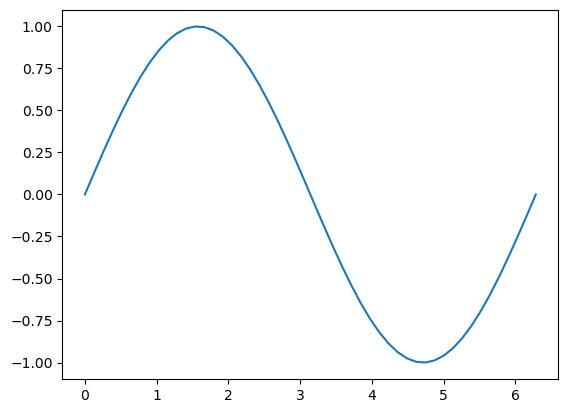

In [166]:
import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(0, 2 * np.pi)
plt.plot(A, np.sin(A))
plt.show()

첫 번째로 numpy linspace 함수를 호출한다 이 함수는 2개의 특정 점을 쌍으로 한 값을 생성하여 균일한 간격으로 총 N개의 값을 생성한다. N의 기본값은 50이다.  

A = np.linspace(0, 2 * np.pi)  

그러고 나면 배열 A에는 0부터 2 * pi까지 두 값 사이에 균일한 간격으로 48개의 다른 부동소수점들이 채워진다.  

이제 값이 채워진 2개의 배열을 plot 함수에 넣어서 호출한다. A는 X축에 위치하는 값 50개를 지니고 있으며, 두 번째 배열은 A 각 항목의 사인 값을 지니고 있다.  

plt.plot(A, np.sin(A))  

이 함수는 A의 각 항목을 순회하면서 두 번째 배열에 같은 위치의 값을 선택하여 50개의 (x, y) 쌍을 만든다. 최종적으로 show 함수가 결과를 화면에 그래프로 표현한다. 추가로 np.sin을 np.cos로 바꾸면 쉽게 코사인 함수 그래프를 그릴 수도 있다. 



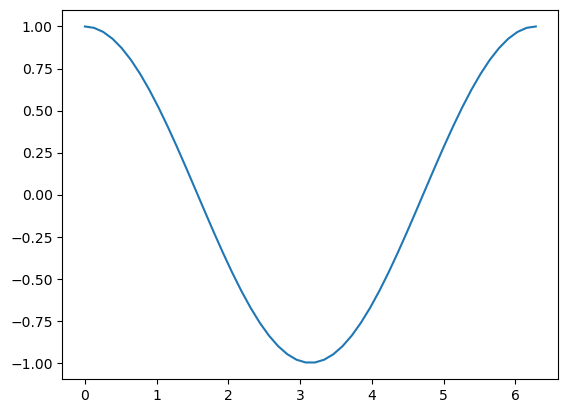

In [167]:
import numpy as np
import matplotlib.pylab as plt

A = np.linspace(0, 2 * np.pi)
plt.plot(A, np.cos(A))
plt.show()

이 버전은 A에 대한 각 값의 코사인 값으로 (x, y)쌍을 생성한다  

삼각함수 외에도 다양한 그래프를 그릴 수 있다. numpy 배열의 유연성은 단순하고 범용적인 matplotlib을 이용하여 다양한 플로팅을 할 수 있게 한다  

예를 들어 역수 함수 그래프(즉, 1/N)를 표시하려면 어떻게 해야 할까? 5의 역수는 1/5이며, 1/5의 역수는 5이다  

X 값 범위를 생성하는 것부터 시작해 보자. 이 경우에는 np.linspace 함수가 매우 유용하다. np.linspace 함수로 원하는 도메인으로부터 값을 만든다. 종종 이렇게 생성된 값들은 X축을 따라 단조롭게 증가하기도 한다.  

1/N은 0으로 나눌 수 없기 때문에 0으로 시작할 수 없다. 대신 0.1 값부터 시작하여 10까지 넣어 보자. 기본적으로 값이 50개 생성될 것이다. 

In [168]:
A = np.linspace(0.1, 50)

이제 A와 1/A을 사용하여 (x,y) 쌍에 넣을 값을 생성할 것이며, 결과를 쉽게 플로팅하고 표시할 수 있게 되었다. A의 각 값은 해당 값의 역수와 일치한다.

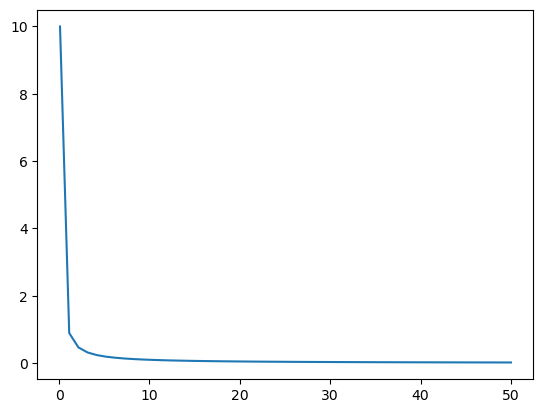

In [169]:
plt.plot(A, 1/A)
plt.show()

이 함수는 A와 1/A의 값을 조합한 점들을 생성한다. 예를 들어 첫 번째 (x, y) 쌍은 다음과 같다.  

(0.1, 10.0)  

두번째 점은 A의 다음값과 해당 값의 역수로 구성된 집합이다. 여기에 플로팅할 수 있는 몇개의 점들이 있다.  

(0.1, 10.0), (0.2, 5.0), (0.3, 3.3),...  

이해하기 쉬운 예시를 하나 살펴보자. 몇 개의 점을 그려서 연결시키는 것이다. 다음과 같은 다섯 가지 값을 준비하자.  

(0, 1)  
(1, 2)  
(2, 4)  
(3, 5)  
(4, 3)  

이 그래프를 위한 점들은 다음 문장으로 생성할 수 있다.  

plt.plot([0, 1, 2, 3, 4], [1, 2, 4, 5, 3])  

X 인수가 생략되면 기본값은 [0, 1, 2, ..., N-1] 이 된다. (N은 Y 배열 길이). 다음 코드와 같이 말이다.  

plt.plot([1, 2, 4, 5, 3])  

두 경우 모두 Show 함수를 호출하면 다음과 같다. 

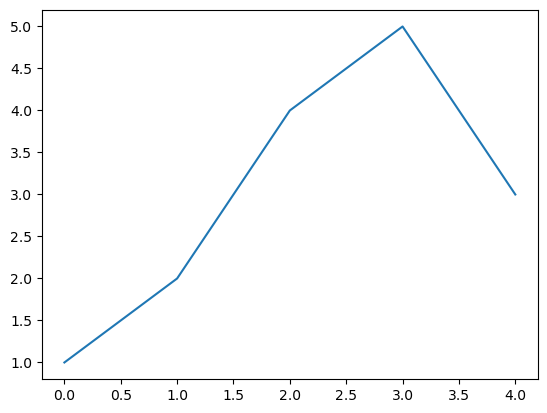

In [170]:
plt.plot([1, 2, 4, 5, 3])
plt.show()

반드시 오름차순 값을 사용할 필요는 없다는 점을 기억하자. 임의의 점을 사용하여 임의의 선을 작성할 수도 있다. 예를 들면 다음과 같다.  

plt.plot([3, 4, 1, 5, 2, 3], [4, 1, 3, 3, 1, 4])  

점들은 다음과 같이 될 것이다.  

(3, 4), (4, 1), (1, 3), (5, 3), (2, 1), (3, 4)  

이 점들은 다음과 같이 별 모양을 그린다. 모든 점을 표시한 후 점과 점 사이에 선을 그린다.

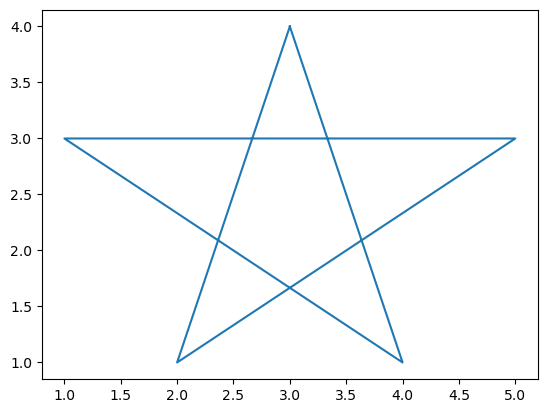

In [171]:
plt.plot([3, 4, 1, 5, 2, 3], [4, 1, 3, 3, 1, 4])
plt.show()

이 절의 마지막 예제는 수식을 원하는 만큼 복잡하게 만들어서 그래프로 표시할 수 있다는 것을 보여준다. 이것이 바로 numpy 배열의 아름다움이다. 복잡한 다항식을 그래프로 표시하는 것은 간단하다. 예를 들면 다음과 같다. 이 코드의 실행 결과는 밑의 그림과 같이 다항식을 그래프로 표시한다.

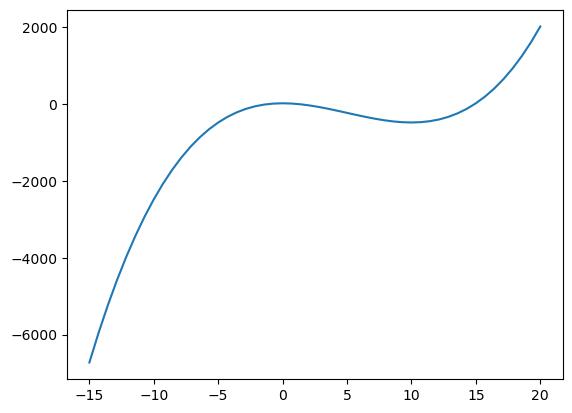

In [172]:
import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(-15, 20)
plt.plot(A, A ** 3 - (15 * A ** 2) + 25) 
plt.show()

### 여러 선 그래프 그리기  

사인 함수와 코사인 함수를 서로 비교하기 위해 두 그래프를 모두 포함하는 조금 더 복잡한 그래프를 그리려면 어떻게 해야 할까? plot 함수를 두 번 호출하면 가능하다. 예시를 살펴보자.

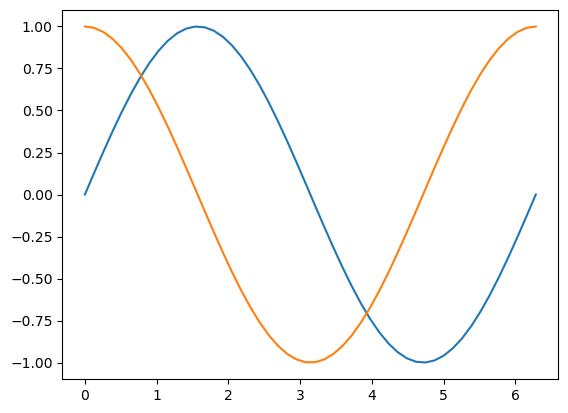

In [173]:
import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(0, 2 * np.pi)
plt.plot(A, np.sin(A))
plt.plot(A, np.cos(A))
plt.show()

다른 방법으로 2개의 plot 문을 인수가 4개인 하나의 문장으로 합칠 수도 있다. 

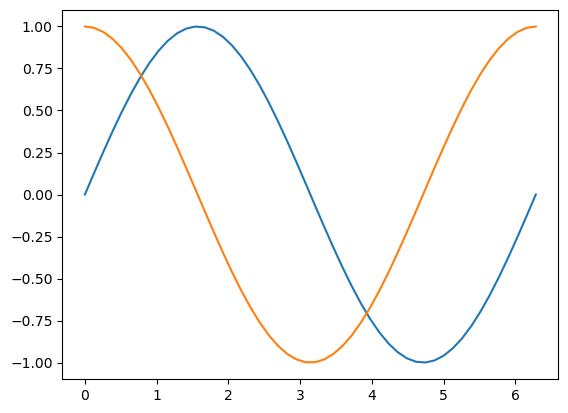

In [174]:
plt.plot(A, np.sin(A), A, np.cos(A))
plt.show()

matplotlib 패키지는 자동으로 2개의 다른 색인 주황색과 파란색의 그래프 곡선을 그린다. 컴퓨터 스크린으로 볼 때는 보기 좋지만, 흑백 출력물로는 두 그래프를 구분하기 어려울 것이다. 다행히 그래프를 그리는 소프트웨어는 다음과 같이 다양한 곡선을 그릴 수 있는 인수를 제공한다. 조금 더 복잡한 plot 함수를 살펴보자.  

plt.plot( X1, Y1, [fmt1,] X2, Y2, [fmt2,] ...)  

문법을 살펴보면 X,Y 쌍의 배열의 개수에는 제약이 없다. 각 쌍으로부터 (x, y)의 각 항목과 같은 순서로 X, Y를 인수로 넣는다. 그런 다음 선택적으로 포맷 인수를 추가할 수 있다.  

fmt 인수는 그래프의 색과 스타일을 정하여 구분하는 데 유용하다. 가령 다음 plot 문은 코사인 함수를 작은 원으로 구성된 그래프로 그려준다. 

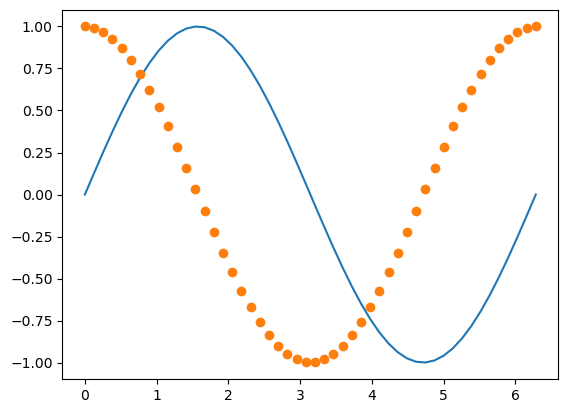

In [175]:
plt.plot(A, np.sin(A), A, np.cos(A), 'o')
plt.show()

사인 커브는 포맷 지시자가 없기 때문에 기본 설정으로 출력되며 기본적으로 두 그래프는 서로 다른 색으로 출력된다.  

이 포매팅은 극적인 대비를 만들어 낸다. 여깅 사인 곡선의 스타일을 지정하면 훨씬 더 뚜렷한 대비를 만들 수 있다. ^ 형식 기호는 곡선이 작은 삼각형으로 구성되는 것을 지정한다.  

하는 김에 또 다른 플로팅 함수인 title을 살펴보자. 이 간단한 함수는 show 함수를 호출하기 전에 그래프 제목을 지정하는 데 사용한다. xlabel과 ylabel 함수는 각 축의 구체적인 라벨을 지정한다. 

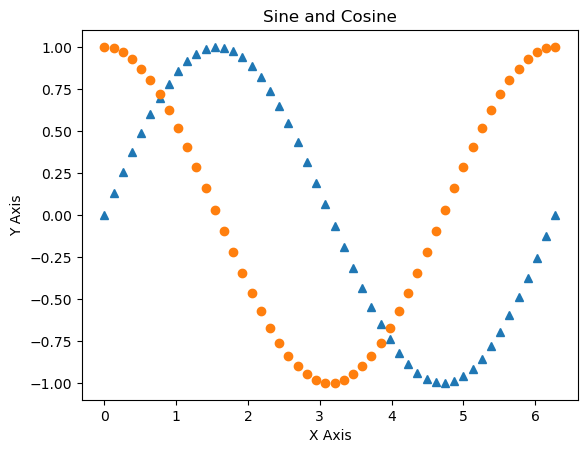

In [176]:
plt.plot(A, np.sin(A), '^', A, np.cos(A), 'o')
plt.title('Sine and Cosine')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

plt.plot 함수를 사용하면 모든 포매팅 문자를 확인할 수 있다. 이 문자들은 'og'와 같이 조합할 수 있으며, "작은 초록색 원을 사용하여 그래프를 그려라"라는 의미다. 

문자들은 색을 지정하는 데 사용된다.  

* b : 파란색
* g : 초록색
* r : 빨간색
* c : 청록색
* m : 자홍색
* y : 노란색
* k : 검은색
* w : 흰색  

플로팅 포맷 문자열의 모양 문자  

* . : 점
* , : 픽셀
* o : 원
* v : 아래를 가리키는 삼각형
* ^ : 위를 가리키는 삼각형
* < : 왼쪽을 가리키는 삼각형
* \> : 오른쪽을 가리키는 삼각형
* s : 네모
* p : 오각형
* (별모양) : 별표 
* h, H : 육각형
* (더하기 기호) : 더하기 기호
* d, D : 마름모

### 복리 그래프 그리기  

다음 시나리오를 상상해보자. 여러분은 직접 이율을 선택할 수 있는 신탁 펀드를 받게 되었다. 플랜 A는 매년 2달러씩 추가된다. 하지만 돈을 인출하기 전까지 돈을 만질 수 없다. 돈을 인출하는 순간 지금까지 입금한 모든 돈을 얻고, 펀드는 종료된다. 2달러가 유일한 상승 이율이다.  

대안으로 플랜 B는 동일한 조건이 적용되는데, 매년 펀드에 2달러씩 추가되는 대신 플랜 B는 1달러부터 시작해서 매년 10%씩 증가한다.  

선택은 쉬워 보인다. 한 펀드는 1년에 2달러씩 증가하는 반면, 다른 펀드는 적어도 초기에 10센트씩 증가하는 데 그친다. 확실히 A가 더 좋다.  

그러나 플랜 A는 일정한 비율로 증가하는 반면, 플랜 B는 복리다. 회계사 뿐만 아니라 모든 훌륭한 수학자는 다음 공식을 알아야 한다  

* 지수 증가(복리 이자 등)는 아무리 느리더라도 결국 선형 증가를 추월한다.  

이것은 놀라운 사실이며, 특히 1달러당 .001%의 복리 증가가 결국 연간 100만 달러의 꾸준한 수입을 추월하게 된다는 것을 의미한다고 생각하면 더욱 더 놀랍다! 그나저나 복리 펀드가 100만 달러짜리 펀드를 추월하려면 죽을때쯤 될듯  

이 변화는 그래프로 나타내기 쉽다. 시간 축을 따라 값을 나타내는 numpy 배열 A를 만드는 것으로 시작하자. 60년으로 기간을 설정하자.

In [177]:
A = np.linspace(0, 60, 60)

그러고 나서 연간 2달러의 선형 증가 함수와 연간 10%의 복리 증가 함수를 비교한다. 10% 복리 증가는 수학적으로 숫자 1.1을 N으로 곱하는 것과 동등하다 여기에서 N은 연 수다.  

* 2 * A : 매년 2달러 증가 공식 
* 1.1 ** A : 매년 10% 증가 공식  

첫 번째 곡선은 포맷 문자열 'o'를 사용하여 작은 원으로 그릴 것이다. 

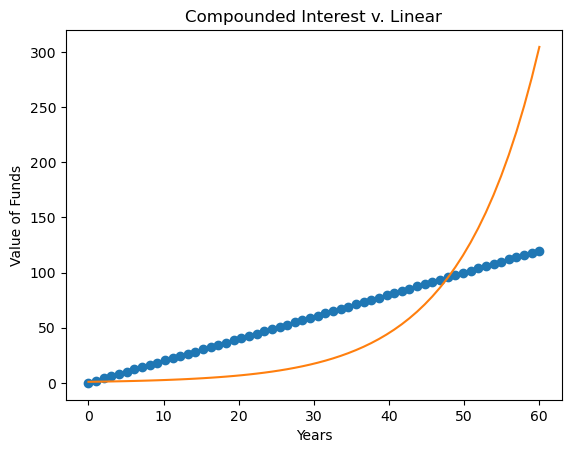

In [179]:
plt.plot(A, 2 * A, 'o', A, 1.1 ** A)
plt.title('Compounded Interest v. Linear')
plt.xlabel('Years')
plt.ylabel('Value of Funds')
plt.show()

처음 30년 동안 단리 펀드는 복리 펀드를 앞지른다. 그러나 30년에서 50년 사이에 플랜 B의 가속화된 증가가 눈에 띈다 플랜 B는 최종적으로 50년 직전에 선형 펀드를 넘어선다.  

따라서 50년을 기다릴 수 있다면 플랜 B가 더 나은 선택이다. 결국 충분히 기다릴 수 있다면 플랜 B가 플랜 A를 훨씬 앞서게 된다. 

### matplotlib으로 히스토그램 만들기  

히스토그램은 데이터를 보는 다른 방법을 제공한다. 개ㄹ 데이터 점을 연결하는 대신 히스토그램은 데이터가 하위 범위에 포함되는 빈도를 보여준다.  

데터는 버킷 혹은 통 안에 수집되며, 각 통은 범위를 의미한다. 지난 11장에서는 이 작업을 수동으로 했지만, numpy와 matplotlib 패키지가 이를 자동으로 해준다.  

간단한 예시로 시작해 보자. 여러분이 속한 소프트웨어 개발 팀에서 함께 일하는 동료들의 IQ를 담은 리스트가 있다고 가정해 보자. 여러분은 아마도 어떤 지수가 가장 많은지 알고 싶을 것이다. 


In [1]:
IQ_list = [91, 110, 105, 107, 135, 127, 92, 111, 105,
           106, 130, 145, 145, 128, 109, 108, 98, 129, 100,
           108, 114, 119, 99, 137, 142, 145, 112, 113]

이 파이썬 리스트를 numpy 배열로 쉽게 바꿔보자.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

IQ_A = np.array(IQ_list)

데이터를 히스트그램 그래프로 그리는 것은 모든 과정 중 가장 쉬운 단계다. 하나의 인수만 있으면 되기 때문이다. hist 함수가 차트를 그린다. 그러고 나면 평상시대로 show 함수가 결과를 스크린에 실제로 보여준다

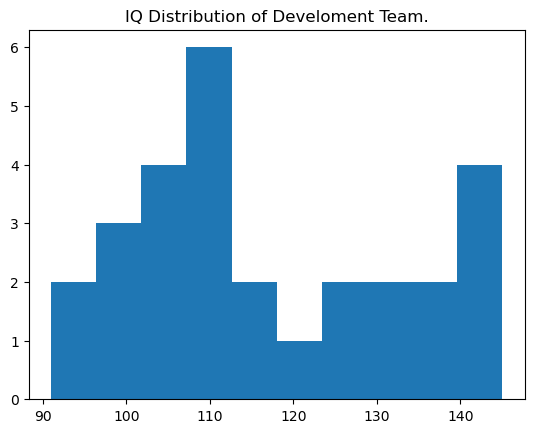

In [4]:
plt.hist(IQ_A)
plt.title('IQ Distribution of Develoment Team.')
plt.show()

조금 더 완전한 문법을 확인해 보자.  

plt.hist(A [, bins=10] [, keyword_args])  

첫 번째 인수 A는 필수 인수이며, numpy 배열을 참조한다.  

bins 인수는 하위 범위, 혹은 통의 개수를 정의한다. 기본 설정은 10이며, 가장 큰 값부터 가장 작은 값의 차이를 10으로 나누어서 하위 범위의 크기를 정한다. 하지만 10이 아닌 다른 값으로 설정할 수도 있다.   

plt.hist(A, bins=50) : 결과를 50개의 통에 넣어라.  

이 함수가 수용하는 다른 키워드 인수로는 color가 있으며, align 인수는 'left','right',혹은 'mid'를 설정할 수 있으며, cumulative 인수는 불리언 값을 넣어서 값 누적 유무를 설정할 수 있다. 자세한 내용은 다음과 같이 도움말을 참고하기 바란다.  

help(plt.hist)



히스토그램의 다른 사용 방법은 정규 분푸 곡선 그래프를 그릴 수 있다는 것이다.  

numpy의 random 패키지를 사용하여 정규 분포 내의 20만개 데이터를 생성하는 것으로 시작 해 보자. 이 분포의 평균은 0.0이고 표준 편차는 1.0이다. 그러나 덧셈과 곱셈을 통해 평균이 100이고 표준 편차가 10인 값의 배열로 변환할 수 있다. 그 결과를 그래프로 그리면 기본 설정으로 인해 10개의 통으로 나누어 질 것이다. 하지만 더 작은 하위 범위로 그래프를 그리는 것이 더 만족스러운 결과를 가져올 것이다. 80개의 통으로 지정하고 색도 초록색으로 설정해 보자.

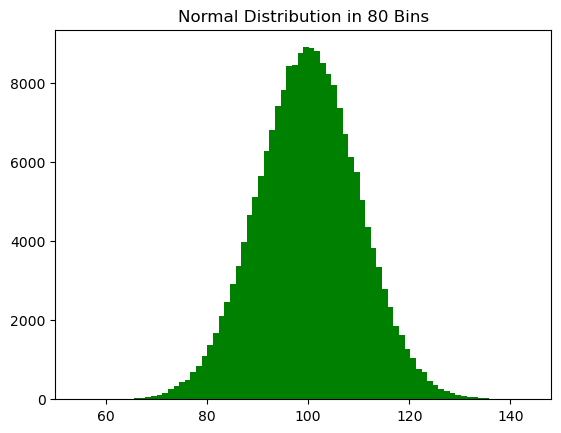

In [6]:
A = np.random.standard_normal(200000)
A = A * 10 + 100

plt.hist(A, bins=80, color='g')
plt.title('Normal Distribution in 80 Bins')
plt.show()

여러 개로 나열된 바 대신 부드러운 곡선으로 이 데이터를 표현할 수도 있다. numpy는 하위 범위(통)들의 숫자 빈도를 생성하는 histogram 함수를 제공한다. 매우 중요한 인수 2개를 갖는 일반적인 문법을 살펴보자.  

np.histogram(A [, bins=10] [, keyword_args])  

이 함수는 히스토그램 결과를 담은 신규 배열을 만든다. 신규 배열의 각 항목은 각 통에 대응하는 숫자의 빈도다. 기본적으로 통의 개수는 10개다. 결과 배열은 다음과 같은 규칙을 따른다.  

* 첫 항목은 첫 번째 통(하위 범위 중 첫번째)에 들어갈 값의 숫자를 지닌다  
* 두 번째 항목은 두 번째 통(하위 범위 중 두번째)에 들어갈 값의 숫자를 지닌다.  
* 이 과정이 반복된다  

실제로 반환되는 값은 튜플이다. 튜플의 첫 번째 항목은 그래프에 표현하고자 하는 빈도수 숫자다. 두 번째 항목은 통의 정확한 경계다. 필요한 데이터를 가져오려면 다음 코드를 사용하면 된다.  

np.histogram(A, bins)[0]  

이제 우리는 부드러운 정규-분포 곡선을 생성할 수 있다. 큰 규모의 임의 숫자를 생성해서 50개의 통에 넣어보자(다른 숫자를 골라도 되지만, 50개에서 100개의 숫자가 좋은 결과를 보여준다) 최종적으로 통의 빈도 숫자를 그래프로 표현해 보자. 이번 예시는 200만 건의 샘플 데이터를 사용하지만 놀랍게도 인식할 만한 지연 없이 값을 확인할 수 있다. 

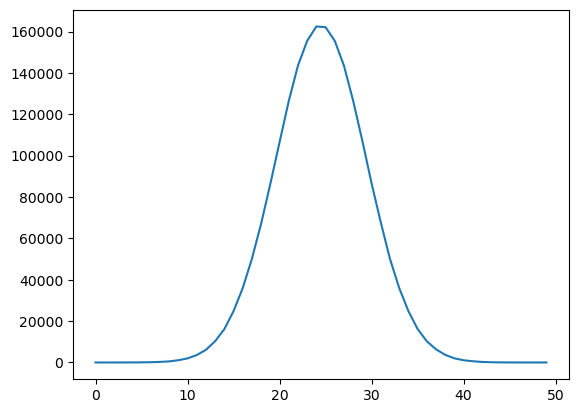

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.standard_normal(2000000)
A = A * 10 + 100
B = np.histogram(A, 50)[0]
plt.plot(B)
plt.show()

이 코드에는 'X'축 배열ㅇㄹ 위한 인수가 지정되지 않았지만 기본값으로 설정된다. 플로팅 소프트웨어는 histogram 함수의 결과인 B 배열의 길이를 N이라고 할 때 0, 1, 2, ..., N-1을 X 좌표로 사용한다.  

위 결과 그래프는 매끄럽고 보기 좋은 곡선이다. 그러나 X축은 여러분이 기대하는 것이 아닐 수도 있다. X축에 보이는 숫자는 통 번호를 의미한다.  

범위는 난수 중 가장 낮은 값부터 가장 높은 값으로 구성되며, 이 범위를 50개의 부분으로 나눈다. Y축은 각 통의 숫자 빈도를 나타낸다.  

하지만 X축의 통 번호를 보여주는 것보다 분포 자체의 값을 보여주는 것이 더 유용할 것이다. 가장 간단하게 이를 고치는 방법은 'X'축 값을 각 통의 중간 값으로 표기하는 것이다. 다음 예시가 바로 np.histogram이 반환하는 두 번째 배열을 사용하여 이를 구현하고 있다.  

복잡하게 들릴 수도 있지만, 코드 몇 줄만 추가하면 되는 일이다. 이 경우에는 X가 통의 경계를 표현하고 있다가 해당 통의 중간 값으로 변경되고 있다. 이렇게 하면 빈도는 통의 숫자 대신(중앙을 100으로 하는) 분포 값에 따라 그래프가 그려진다. 

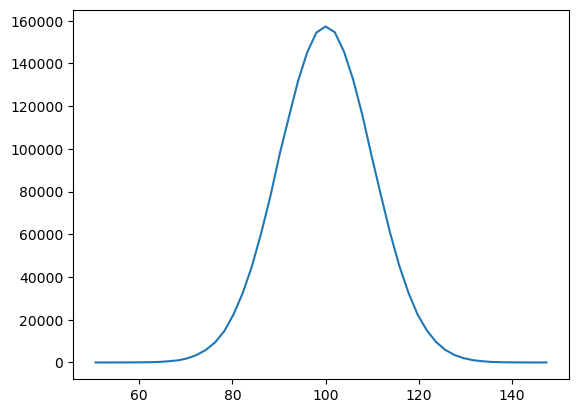

In [9]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.standard_normal(2000000)
A = A * 10 + 100
B, X = np.histogram(A, 50)
X = (X[1:]+X[:-1])/2
plt.plot(X, B)
plt.show()

X 값은 각 하위 범위의 중간 값을 가져오기 위해 계산된다. 경계의 최하위 값과 최상위 값의 중간 값을 구하는 것이다. 표현식 X[1:]은 두 번째 항목부터 시작하기 때문에 첫 번째 항목을 건너뛴다. 표현식 X[:-1]은 마지막 항목을 제외하여 길이를 같게 만든다.  

X = (X[1:]+X[:-1])/2  

변경된 히스토그램 그래프를 확인해 보면, 그래프의 중앙이 100이며 표준 편차 10을 보여준다. 표준 편차 10은 곡선 면적의 약 95%가 2편차 이내, 99% 이상은 3편차 이내이어야 함을 의미한다.  

histogram 함수의 또 다른 사용법을 알아보자. 가령 11장에서 큰 숫자 법칙을 보여주기 위해 사용한 코드 일부를 변경할 수 있다. 이 절의 예시는 데이터를 일련의 통에 담는다. histogram 함수는 같은 작업을 하지만 훨씬 빠르다.  

다른 인수들도 간혹 유용할 때가 있다 IDLE에서 다음 명령어를 실행하면 모든 인수 정보를 확인 할 수 있다.  

np.info(np.histogram)

### 원과 가로세로 비율  

간혹 여러분은 X과 Y축의 상대적인 위치를 조정하고 싶을 것이다. 특히 기하학적 모양을 그릴 때 더욱 필요하다. 이 절에서는 원을 그리는 방법을 살펴볼 것이다. 보통 타원처럼 보이지 않게 하기 위해 그래프를 보여 주기 전에 X와 Y의 가로세로 비율을 동일하게 조정하겠다.  

동그라미를 그리는 방법은 여러 가지가 있지만, 이 절에서는 삼각함수를 활용하는 접근 방식을 사용할 것이다. 원 위의 각 점은 세타라고 불리는 각도에 의해 정해진다. 예를 들어 시작점에서 시계반대 방향으로 90도인 원의 점은 90도, 혹은 라디안 단위로를 pi/2가 된다. 이와 비슷하게 위치도 Y좌표로 다음과 같이 주어진다.  

sine(theta)  

벌레의 움직임을 추적하면 원을 도는 여전에 해당하는 일련의 점들을 얻는다. 이 여정의 각 지점은 다음과 같은 (x, y) 좌표로 표현할 수 있다.  

(cosine(theta), sine(theta))  

따라서 완전한 원을 그래프로 표시하려면 0부터 2 * pi(360도와 동일) 범위의 많은 각도에 해당하는 일련의 점을 얻어야 한다. 그런 다음 결과 (x, y) 쌍을 그래프로 표시한다. 우리는 1,000개의 데이터 점을 구하여 멋지고 부드러운 곡선을 만들 것이다. 

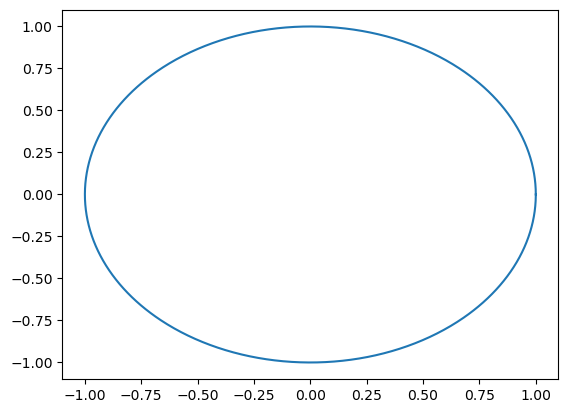

In [10]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.cos(theta), np.sin(theta))
plt.show()

위 코드를 실행하면 원보다는 타원에 가까운 모습으로 그려진다. 이를 해결하려면 plt.axis 설정으로 X와 Y 단위를 화면에 동일한 공간을 차지하게 지정해 주어야 한다.  


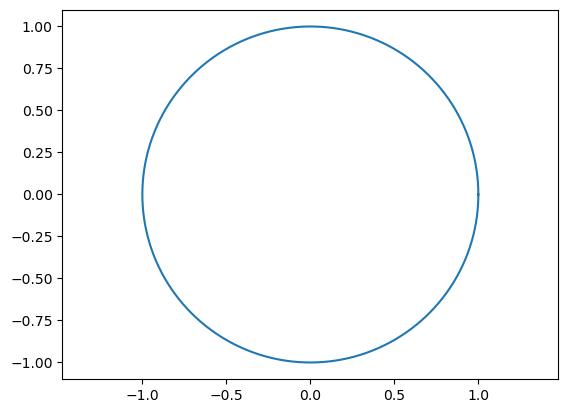

In [12]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.cos(theta), np.sin(theta))
plt.axis('equal')
plt.show()

### 파이 차트 만들기  

numpy와 matplotlib 패키지가 제공하는 다양한 기능은 파이 차트까지 확장된다. 이는 여러 조각의 상대적인 크기로 나누어진 데이터를 표현하는 데 효율적인 바업이다.  

plt.pie 함수 문법은 다음과 같다. 다른 플로팅 함수처럼 여러 인수가 있지만, 필수 인수들은 다음과 같다.  

* plt.pie(array_data, labels=None, colors=None)  

첫번째 인수 array_data는 각 카테고리의 상대적 크기를 지니고 있는 컬렉션이다.  

두번째 인수 labels 인수는 첫번째 인수의 각 그룹에 해당하는 라벨을 문자열로 담고 있는 컬렉션이다.  

세번째 인수 colors 인수는 색을 지정하는 문자열을 담고 있는 컬렉션이다.  

예시를 보면 간단한 함수다. 여러분이 속한 개발 팀 동료들이 업무 시간 외에 하는 활동을 차트로 그리고 싶다고 가정해 보자.  

* 포커, 3.7, 검은색('k')
* 체스, 2.5, 초록색('g')
* 운동, 0.5, 청록색('c')
* 만화책, 1.9, 빨간색('r') 

각 열의 데이터를 리스트에 담는 것도 어렵지 않다. 다음 코드에서 각 리스트는 4개의 항목을 가지게 될 것이다. 

In [13]:
A_data = [3.7, 2.5, 1.9, 0.5]  
A_labels = ['Poker', 'Chess', 'Comic Books', 'Exercise']  
A_colors = ['k','g', 'r', 'c']  

이제 이 데이터를 파이 차트에 연결하고 제목과 함께 출력해 보자.  
원형 차트의 가로세로 비율은 앞서 했던 것 처럼 plt.axis('equal')문구를 사용하여 고정할 수 있다. 그렇지 않으면 파이는 원이 아닌 타원으로 나타날 것이다. 

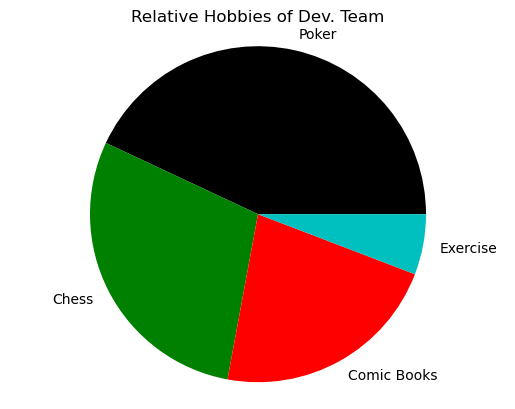

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.pie(A_data, labels=A_labels, colors=A_colors)
plt.title('Relative Hobbies of Dev. Team')
plt.axis('equal')
plt.show()

### numpy로 선형대수학 구현하기  

numpy 패키지를 살펴본 이 두 장을 마무리하기 전에, 수학자나 엔지니어에게 가장 유용한 영역인 벡터(배열)와 행렬(다차원 배열)을 다루는 선형대수학 구현 방법을 살펴볼 것이다.  

numpy에서 별도의 '벡터' 또는 '행렬' 컬렉션 타입을 사용할 필요는 없다. 

##### 점곱(dot product)  

지난 마지막 2개의 장에서 살펴보았듯이 우리는 배열에 스칼라를 곱하거나 배열에 배열을 곱할 수 있었다. 배열에 배열을 곱하려면 반드시 두 배열의 구조가 같아야 한다. 이 관계를 다음과 같이 요약할 수 있다.  

(A, B) * (A, B) => (A, B)  

이 처럼 A, B 구조의 배열을 A,B 구조의 다른 배열과 곱할 수 있으며, 같은 구조의 세 번째 배열을 얻을 수 있다. 하지만 numpy를 사용하면 조금 더 복잡한 규칙과 함께 점곱 함수인 dot으로 이 작업을 수행할 수 있다.  

numpy.dot(A, B, out=None)  

A와 B, 2개의 배열은 점곱으로 합쳐진다. out인수가 주어지면, A와 B와 동일한 구조를 가진 결과 배열을 out 인수에 담는다.  

2개의 1차원 배열 점곱은 단순한다. 두 배열은 반드시 길이가 같아야 한다. A의 각 항목은 B의 같은 위치의 항목과 곱해진 후 모두 더해서 하나의 스칼라 값을 생산한다.  

D. P. = A[0]*B[0] + A[1]*B[1] + ... + A[N-1]*B[N-1]  

예시를 살펴보자. 

In [16]:
import numpy as np

A = np.ones(5)  
B = np.arange(5)  
print(A, B)
np.dot(A, A)

[1. 1. 1. 1. 1.] [0 1 2 3 4]


5.0

B와 B의 내적 결과가 30인것을 알 수 있다. 이를 일반화 하면 다음과 같다  

D. P.(A, A) = sum(A * A)  

2차원 배열 2개의 내적을 구하는 것은 조금 더 복잡하다. 배열 간에 일반 곱하기는 2개의 배열 구조가 반드시 같아야 한다. 하지만 내적은 1개의 차원만 동일하면 된다.  

다음은 2차원 배열과 동작하는 내적의 동작 방식을 묘사한 일반적인 패턴이다.  

(A, B) * (B, C) => (A, C)  

2X3 배열과 3X2 배열을 조합하여 얻은 내적은 다음과 같이 2X2 배열이다. 

In [17]:
A = np.arange(6).reshape(2, 3)
B = np.arange(6).reshape(3, 2)
C = np.dot(A, B)
print(A, B, sep='\n\n')
print('\nDot product:\n', C)

[[0 1 2]
 [3 4 5]]

[[0 1]
 [2 3]
 [4 5]]

Dot product:
 [[10 13]
 [28 40]]


물론 1차원 배열을 2차원 배열과 조합하여 내적을 만들 수도 있다. 결과 배열은 다음과 같은 구조가 된다.  

(1, X) * (X, Y) => (1, Y)  

가령 [10, 15, 30]을 다음 B 배열과 조합하여 내적을 만들 수도 있다  

[[0 1]  
[2 3]  
[4 5]]  

다음 문장은 1차원 배열과 2차원 배열 B간의 점곱을 보여 준다. 점곱 결과는 (1, 2)의 구조를 갖는다

In [18]:
print(np.dot([10, 15, 30], B))

[150 205]


점곱의 유용성을 보여 주는 직관적이고 실질적인 예를 생각해 보자. 3차원 기하학과 같은 특정한 종류의 수학과 물리학에서 이런 예를 많이 찾을 수 있다. 하지만 더 간단한 애플리케이션들이 있다. 여러분이 세 종류의 이국적인 새들을 파는 애완동물 가게를 운영하고 있다고 가정해 보자.  

* 앵무새 : $10  
* 마코앵무새: $15
* 공작새: $30  

밑은 두 달 동안의 월간 판매 수치를 추적한다고 가정한것이다.  

* 앵무새: 0, 1
* 마코앵무새: 2, 3
* 공작새: 4, 5  

2개월간 모든 새의 판매량 총합을 구해 보자.  

이 테이블에서 데이터를 추출하는 것이 어렵지는 않지만, 내적을 구하는 것이 좀 더 쉽다. np.dot으로 필요한 모든 계산을 해 보자. 그러면 0+30+120으로 합계 150을 구한다. 같은 방법으로 두 번째 값을 구하면 205가 나온다. 두 번째 월의 판매량과 해당하는 값을 곱한 후 합계를 구한다. 이 절차에 따라 10+45+150으로 합계 205를 구한다. 그러면 전체 점곱은 다음과 같다  

[150, 205]   

##### 외적 함수  
배열을 곱하는 다른 방법은 외적을 계산하는 outer 함수를 사용하는 것이다. 이 함수는 2개의 1차원 배열로 2차원 배열을 만들기 위해 가장 자주 사용하는 함수다. 이 함수는 더 높은 차원을 가진 배열에서 사용할 경우 각 입력 배열이 1차원으로 평평하게 펴진다.  

* numpy.outer(A, B, out=None)  

이 함수는 A와 B 배열의 외적을 계산하여 반환한다. out 인수가 주어지면 결과를 저장할 목표 배열을 지정하게 돈다. 이 배열은 반드시 존재해야 하며, 적절한 크기여야 한다.  

외적을 구하기 위해 A의 각 항목을 B의 각 항목과 곱한 후 2차원 배열을 생성한다. 여기에서 우리는 구조라는 단어로 관계를 표현하고 있다.  

모든 A * B의 조합을 담고 있는 외적의 결과를 C라고 하면 C[x, y]는 A[x]를 B[x]로 곱한 값을 지닌다. 비교적 간단한 예시를 살펴보자. 

In [19]:
import numpy as np

A = np.array([0, 1, 2])
B = np.array([100, 200, 300, 400])
print(np.outer(A, B))

[[  0   0   0   0]
 [100 200 300 400]
 [200 400 600 800]]


외적의 명확한 사용법은 12장에서 곱셈표를 만들 때 풀었던 문제를 다시 풀면서 확인할 수 있다. numpy 패키지는 훨씬 간단하면서도 더 빠른 해결책을 제공한다. 

In [20]:
A = np.arange(1, 10)
print(np.outer(A, A))

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


11장과 같이 문자열 함수를 사용하면 대괄호 기호를 제거하여 결과를 보기 좋게 정리할 수 있다. 

In [21]:
s = str(np.outer(A, A))
s = s.replace('[', '')
s = s.replace(']', '')
print(' ' + s)

  1  2  3  4  5  6  7  8  9
  2  4  6  8 10 12 14 16 18
  3  6  9 12 15 18 21 24 27
  4  8 12 16 20 24 28 32 36
  5 10 15 20 25 30 35 40 45
  6 12 18 24 30 36 42 48 54
  7 14 21 28 35 42 49 56 63
  8 16 24 32 40 48 56 64 72
  9 18 27 36 45 54 63 72 81


이 4줄을 2줄로 요약할 수 있다. 

In [22]:
s = str(np.outer(A, A))
print(' ' + s.replace('[', '').replace(']', ''))

  1  2  3  4  5  6  7  8  9
  2  4  6  8 10 12 14 16 18
  3  6  9 12 15 18 21 24 27
  4  8 12 16 20 24 28 32 36
  5 10 15 20 25 30 35 40 45
  6 12 18 24 30 36 42 48 54
  7 14 21 28 35 42 49 56 63
  8 16 24 32 40 48 56 64 72
  9 18 27 36 45 54 63 72 81


##### 기타 선형대수학 함수  

numpy는 점곱과 외적 이외에도 다른 선형대수학 함수를 제공한다. 별도의 '행렬' 타입이 필요하지 않다는 것을 기억하자. 표준 numpy 배열 타입, ndarray가 이런 함수들에서 사용된다.  

하지만 선형 대수와 관계가 있는 함수의 리스트는 무척 길며, 책 한 권 분량이다.  

일반적인 선형대수학 함수  

* np.dot(A, B [,out]) : A와 B의 내적
* np.vdot(A, B) : A와 B의 내적 
* np.outer(A, B [,out]) : A의 각 항목을 B의 각 항목과 곱한 외적 구하기. 필요 시 A와 B를 1차원으로 편다. 
* np.inner(A, B [,out]) : A와 B의 내적 구하기 
* np.tensordot(A, B [,out]) : A와 B의 텐서 점곱 구하기 
* np.kron(A, B) : A와 B의 크로네커 곱 구하기 
* np.linalg.det(A) : A의 선형대수 결정인자 구하기 

### 3차원 플로팅  

구의 표면을 이루는 점들을 살펴보면 numpy 함수가 3차원 표면을 만들 때 mpl_toolkits 패키지를 탑재하여 사용할 수 있는데 예시를 살펴보겠다 

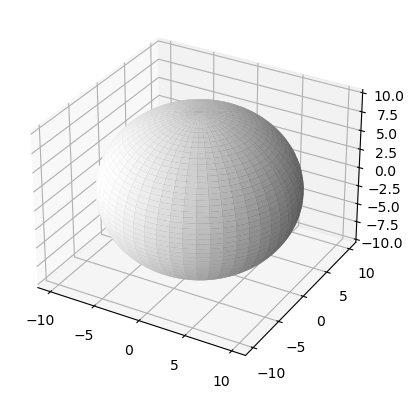

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성 
ua = np.linspace(0, 2 * np.pi, 100)
va = np.linspace(0, np.pi, 100)
X = 10 * np.outer(np.cos(ua), np.sin(va))
Y = 10 * np.outer(np.sin(ua), np.sin(va))
Z = 10 * np.outer(np.ones(np.size(ua)), np.cos(va))

# 표면 그리기 
ax.plot_surface(X, Y, Z, color='w')
plt.show()


이 코드의 대부분은 0에서 2 * np.pi 까지 실행되는 각도의 사ㅣㄴ 및 코사인을 구한 후 외적을 사용하여 결과를 곱한다. 마지막으로 일련의 3차원 점들을 X,Y,Z 배열에 담으면 소프트웨어는 이 배열들로 구체의 표면을 그래프로 표시한다. 

### numpy 금융 애플리케이션  

numpy 패키지 함수를 사용할 수 있는 넓은 범위에는 금융권 영역까지도 포함된다. 예르 들어 이자율과 지급 일정에 대한 데이터를 제공하면 numpy_financial 함수를 사용하여 집이나 자동차 구매 시 지급해야 할 전체 금액의 월별 지급액을 계산할 수 있다.  

numpy_financial(rate, nper, pv [, fv] [, when])  

rate : 백분율이 아닌 부동소수점 숫자로 표현되는 금리다. 예를 들어 0.065는 6.5%의 금리에 해당한다. 이 요금은 각 개별 지급 기간에 대한 요금이기 때문에 연 이율에서 월 이율을 받으려면 12로 나누어야 한다.  

nper : 총 지급 기간의 횟수다. 1년이 아니라 월 단위로 지급하려면 연 수에 12를 곱해야 한다.  

pv : 현재 가치다. 현재 빌리고 있는 돈의 액수다.  

선택적 인수에는 기대 미래 가치인 fv(이 돈이 마지막에 상환될 것으로 가정)가 포함된다. 또 다른 선택적 인수 when에는 지급을 하는 시점이 각 기간 시작 시점이면 값 1을 설정하며, 기간 종료 시점이면 0을 설정할 수 있다.  

다음 데이터가 있다고 가정해 보자.  

* 금리는 6.5%다. 월 이자를 받으려면 12로 나눈다.  
* 대출 기간은 20년이다. 12를 곱하여 월납 횟수를 구한다. 
* 빌린 금액은 25만 달러이다.  

이 데이터를 입력하면 numpy_financial 함수로 손쉽게 월 지급액을 계산할 수 있다. 

In [27]:
import numpy_financial as npf

payment = npf.pmt(0.065 / 12, 20 * 12, 250000)
payment

-1863.93283878775

따라서 가장 가까운 센트로 반올림한 월 지급액은 1,863.93 달러다.  

이 금액은 순 현금 흐름을 나타내기 때문에 음수로 표현된다.  

사용자가 이자율, 연도, 금액을 조정하여 월 지급액을 결정할 수 있는 함수를 다음과 같이 작성할 수 있다. 

In [30]:
import numpy as np
import numpy_financial as npf

def monthly_payment():
    '''데이터를 입력받고, np.financial을 호출하여
    월 납입금을 계산한다.'''
    # 월 이율 계산 
    s = 'Enter rate as a yearly percentage fig.: '
    rate = (float(input(s)) / 100) / 12
    # 납입 월 횟수 계산
    nyears = int(input('Enter number of years: '))
    nper = nyears * 12
    # 대출금 금액 입력 
    pv = float(input('Enter amount of loan: '))
    # 결과 출력
    payment = -1 * npf.pmt(rate, nper, pv)
    print('The monthly payment is: $%.2f' % payment)   

monthly_payment() 

The monthly payment is: $832.07


따라서 30년 만기 대출 15만 5,000달러의 연 5% 금리를 감안하면 월 납입액은 832.07달러다.  

numpy 함수는 월 납입액 중 원금과 이자가 차지하는 금액이 얼마인지 계산할 수도 있다. 월 지급액과 같은 이 두 금액 합계는 다음 함수에 의해 결정된다.  

* numpy.ppmt(rate, per, nper, pv [, fv] [, when])
* numpy.ipmt(rate, per, nper, pv [, fv] [, when])  

추가 인수 per은 현재 우리가 어떤 지급 기간을 가지고 있는지, 즉 지급 기간이 0에서 nper-1로 실행되는지를 지정하는 것이다. nper 인수는 여전히 이런 지급 기간의 총 횟수를 명시한다.  

이런 함수 중 하나인 ppmt를 총 지급액과 결합하여 사용하면, 시간 경과에 따른 총 월 지급액의 몇 퍼센트가 원금인지 보여주는 그래프를 그릴 수 있다. 

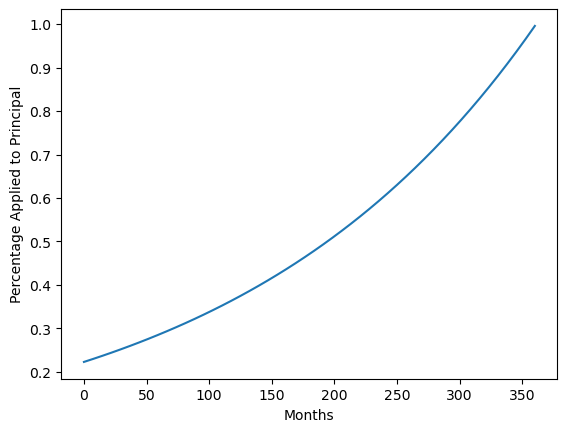

In [32]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# 기본 매개변수 설정
rate = 0.05 / 12   # 연 5%로 가정
nper = 30 * 12   # 기한은 30년으로 가정
pv = 155000   # 대출 금액은 $155,000

# 지급 합계 생성
Total = -1 * npf.pmt(rate, nper, pv)

# 합계 대비 월간 지급 비율(A) 그래프 그리기
A = np.linspace(0, nper)
B = -1 * npf.ppmt(rate, A, nper, pv) / Total

plt.plot(A, B)
plt.xlabel('Months')
plt.ylabel('Percentage Applied to Principal')
plt.show()

### xticks와 yticks로 축 조정하기  

바로 위 금융 그래프를 그리는 건 좋은 시도지만, 몇 가지 부족한 점이 있다.  

첫째, Y축에는 0.2에서 1.0까지 실행되는 눈금이 있다. 축에 0부터 1까지에 해당하는 실제 값을 부여하면 훨씬 보기 좋을 것이다. '0~100%'와 같이 백분율로 표시된 축 눈금으로 표기하는 것이 더 유용할 것이다.  

둘째, X축에는 달에 해당하는 눈금이 있지만 해당 연도를 표시하는 것이 더 유용할 것이다. 2020년부터 2050년까지를 포함한 해당 연도의 라벨을 사용하는 것이 더 나을 수 있다. 이번 예시는 2020년에 대출을 시작한다고 가정할 것이다.  

xticks와 yticks 함수가 이런 문제들을 해결한다. 두 함수 모두 두 가지 인수를 취한다. 첫 번째 항목은 표기할 일련의 데이터 지점을 정한다. 두 번째 인수는 각 지점에서 사용할 일련의 라벨을 지정한다(눈금보다 많은 라벨이 있는 경우 초과된 라벨은 무시된다)  

Y축의 경우 0.2단위 간격으로 눈금을 설정한 후 라벨은 0.0부터 시작하여 백분율 값으로 차례대로 지정할 것이다. arange 함수의 인수로 시작, 끝, 단계 값이 주어진다는 것을 기억한다.  

([<matplotlib.axis.YTick at 0x1194ba430>,
 [Text(0, 0.0, '0'),
  Text(0, 0.2, '20%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.8, '80%'),
  Text(0, 1.0, '100%')])

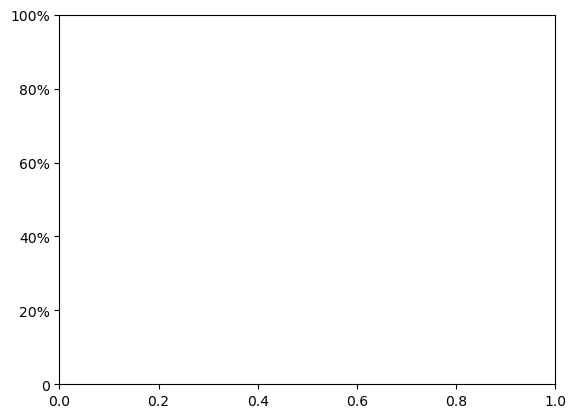

In [34]:
plt.yticks(np.arange(0.0, 1.1, 0.2),
           ('0', '20%', '40%', '60%', '80%', '100%'))

X 축에는 기본 설정인 50개월이 아닌 60개월(5년)마다 눈금을 표기하고 싶다. 따라서 arange 인수에는 시작, 끝, 단계 값으로 0, 361, 60을 설정한다.

([<matplotlib.axis.XTick at 0x11f610ca0>,
 [Text(0, 0, '2020'),
  Text(60, 0, '2025'),
  Text(120, 0, '2030'),
  Text(180, 0, '2035'),
  Text(240, 0, '2040'),
  Text(300, 0, '2045'),
  Text(360, 0, '2050')])

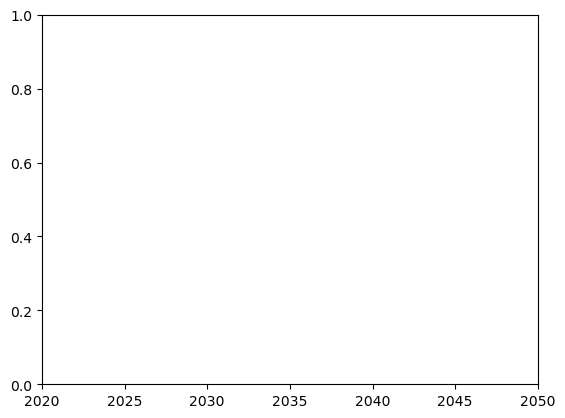

In [35]:
plt.xticks(np.arange(0, 361, 60),
           ('2020', '2025', '2030', '2035', '2040',
            '2045', '2050'))

이제 우리가 할 마지막 작업은 두 문장(plt.xticks와 plt.yticks)을 앞 절의 프로그램 코드에 넣는 것이다. X축 라벨 제목도 '년'으로 바꿀 것이다. 


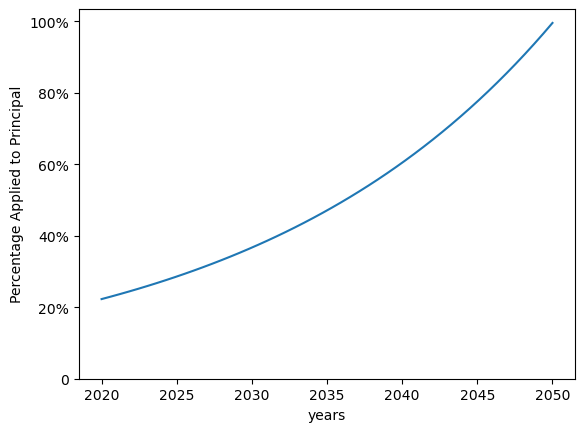

In [37]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# 기본 매개변수 설정
rate = 0.05 / 12   # 연 5%로 가정
nper = 30 * 12   # 기한은 30년으로 가정
pv = 155000   # 대출 금액은 $155,000

# 지급 합계 생성
Total = -1 * npf.pmt(rate, nper, pv)

# 합계 대비 월간 지급 비율(A) 그래프 그리기
A = np.linspace(0, nper)
B = -1 * npf.ppmt(rate, A, nper, pv) / Total

plt.plot(A, B)
plt.xlabel('years')
plt.ylabel('Percentage Applied to Principal')
plt.yticks(np.arange(0.0, 1.1, 0.2),
           ('0', '20%', '40%', '60%', '80%', '100%'))
plt.xticks(np.arange(0, 361, 60),
           ('2020', '2025', '2030', '2035', '2040',
            '2045', '2050'))
plt.show()

### numpy 혼합-데이터 레코드  

numpy 배열에는 파이썬 리스트와 같이 텍스트 문자열 같은 데이터도 저장할 수 있다. 하지만 numpy 배열은 고정-길이 구조로 문자열을 저장하는 차이점을 갖는다.  

문자열 배열과 작업을 할 때 길이를 직접 지정하지 않으면, Numpy는 가장 긴 문자열의 길이를 기준으로 고정 길이를 부여한다. 예시를 살펴보자. 

In [38]:
import numpy as np

Words = np.array(('To', 'be', 'orNotToBe'))
Words

array(['To', 'be', 'orNotToBe'], dtype='<U9')

변수 words에 모든 항목이 U9 문자열 타입인 배열을 생성하여 대입했다. 따라서 각 항목은 파이썬 문자열을 담을 수 있는 정확한 크기가 정해지며, 각각은 최대 9자까지 담을 수 있다.  

9자보다 작은 문자열 값은 언제든지 넣을 수 있지만, 더 긴 문자열이 들어가는 경우 9자를 넘어가는 글자는 잘려 나간다.  

In [39]:
Words[0] = 'My uncle is Caesar.'
Words[0]

'My uncle '

반면 20과 같이 더 긴 문자열 최대 기이를 지정할 수 도 있다. 

In [40]:
Words = np.array(('To', 'be', 'orNotToBe'), dtype= 'U20')

이번 예시에서는 'orNotToBe'의 길이가 기본 최대 문자열 길이가 되는 대신 특별히 입력한 'U20'에 의해 결정되었다. 이제 잘리지 않고 항목에 더 긴 문자열을 대입할 수 있다. 

In [41]:
Words[0] = 'My uncle is Caesar.'
Words[0]

'My uncle is Caesar.'

문자열 주제를 끝내기 전에 Un은 표준 파이썬 문자열을 허용하는 유니코드 문자열이라는 것을 기억하자. Sn은 bytes 문자열을 의미한다(n은 숫자다).  

대량의 정보를 처리할 때 숫자 데이터와 문자열 데이터를 결합한 레코드를 저장하는 경우가 매우 많다. Numpy 배열을 사용하려면 복합 데이터 타입을 저장하는 구조화된 배열을 만들어야 한다. dtype 필드에 name으로 각 필드를 식별하여 포맷을 지정하는 특별한 구조를 만들 수 있다.  

dtype = [(name1, format1), (name2, format2) ...)]  

각 이름과 포맷 지시자는 파이썬 문자열이며, 다음 예시에서 살펴보는 것과 같이 무척 유용하다. 예시를 살펴보자.

In [42]:
X = np.array([(12, 33, 'Red'),
              (0, 1, 'Blue'),
              (27, 103, 'Yellow'),
              (-1, -2, 'Blue')],
             dtype=[('a', 'i4'), ('b', 'i4'), ('color', 'U10')])

print(X)

[(12,  33, 'Red') ( 0,   1, 'Blue') (27, 103, 'Yellow') (-1,  -2, 'Blue')]


자 이제 이 배열의 정보에 어떻게 접근하고 가공할 수 있을까? 이 데이터의 일부를 얻는 한 가지 방법은 색인을 두 번 사용하는 것이다. 예를 들어 다음 문장은 첫 번째 항목으로 주어진 튜플 안의 첫 번째 항목에 접근한다.

In [43]:
X[0][0]

12

그러나 이번 예시에서는 숫자 색인보다는 'a','b','color' 등을 사용하여 의미 있는 이름으로 구분 할 수 있는 항목들을 모두 가져오는 것이 더 유용하다. 첫 번째 필드인 'a'와 관련된 모든 정수를 가져오는 방법은 다음과 같다.

In [44]:
print(X['a'])

[12  0 27 -1]


다음 일련의 문장 뒤에 변수 A는 'a'라는 필드에서 수집된 모든 정수를 포함하는 numpy 배열을 가리킨다. 이 데이터가 1차원 배열로 수집된 후에는 무엇보다도 합계, 평균, 표준 편차를 구할 수 있는 이점을 갖는다.

In [45]:
A = X['a']
np.sum(A)

38

In [46]:
len(A)

4

In [47]:
np.mean(A)

9.5

In [48]:
np.std(A)

11.324751652906125

X의 각 항목에서 추출한 두 번째 정수 필드를 가져와서 만든 배열 B에도 같은 작업을 할 수 있다. 

In [49]:
B = X['b']
print(B)

[ 33   1 103  -2]


마지막으로 'color' 필드의 모든 값을 수집하여 문자열 리스트를 얻을 수 있다. 

In [50]:
C = X['color']
print(C)

['Red' 'Blue' 'Yellow' 'Blue']


한편 원한다면 특정 열 값을 통째로 바꿀 수 있다. 예를 들어 전체 'b'열을 0으로 지정하려면 다음 문장으로 X의 내용을 변경할 수 있다. 

In [51]:
X['b'] = 0

### 파일에서 numpy 데이터 읽고 쓰기  

데이터를 얻는 주된 방법 중 하나는 이진 또는 텍스트 파일로부터 데이터를 읽는 것이다. 이 절에서는 텍스트 파일을 numpy 배열로 직접 읽는 방법을 보여준다.  

간단한 예시로 읽고 싶은 데이터를 일련의 레코드로 저장하는데, 하나의 레코드는 쉼표로 구분된 필드로 1줄씩 저장된다고 가정해 보자. 데이터를 저장하는 일반적인 방법이다. 이 절에서는 10개의 레코드로 구성된 파일을 찾아보겠지만, 물론 그런 레코드는 수천 개 또는 수백만 개에 달할 수 있다.  

파일 이름은 team_data.txt다. 이 파일에는 다음과 같이 여러분 개발 팀원들에 대한 레코드가 포함되어 있다.  

* IQ, 정수 
* 키, 부동소수점 숫자 
* 나이, 정수
* 마지막 고과 평가(0.0부터 4.0가지), 부동소수점
* 대학, 유니코드 문자열  

이런 데이터는 수천 건이 될 수도 있지만, 우리는 간단한 예시를 살펴보기에 10건만 사용한다는 것을 기억하기 바란다.  

가장 먼저 해야 할 일은 각 레코드의 구조를 나타내는 튜플 목록을 만드는 것이다. 각 열의 이름이 포함되어 있어 나중에 참조할 수 있다.  


In [52]:
dt = [('IQ', 'i2'), ('Height', 'f4'), ('Age' ,'i2'),
      ('Rating', 'f4'), ('Callege', 'U30')]

모든 필드는 다른 크기를 가질 수도 있다. 가령 2바이트보다 큰 정수가 필요하다면 4바이트 정수(i4)를 사용하면 된다. 더 많은 소수점으로 구성된 부동소수점 숫자를 저장하고 싶다면 'f8'을 사용하면 된다. 하지만 필드의 크기를 키우면 메모리의 더 큰 영역을 차지하는 비용을 수반하게 된다.  

일단 앞 예시의 설정을 따르도록 하자. 다음 문법은 텍스트 파일을 어떻게 numpy 배열로 읽어오는지 보여주고 있다. 온라인을 찾아보면 다른 인수도 찾아볼 수 있다. 그런 인수 중에는 특정 열이나 행을 입력하지 않아도 된다.  

array = np.loadtxt(fname, dtype=<class 'float'>, delimiter)  

이 함수는 사용하기 쉽다. 파일을 미리 열 필요도 없다. 대신 텍스트 모드에서 읽을 수 있는 파일이 자동으로 열린다. 파일을 열 수 없는 경우 IOError 예외가 발생한다.  

fname 인수는 열고자 하는 파일 이름을 지니는 문자열이며, 전체 경로 이름이 될 수 있따. dtype 인수는 앞서 만든 dt 리스트와 같이 데이터 타입을 나열한 배열이다. 이 예시의 필드 구분자는 쉼표다.  

밑의 코드는 이 절의 시작 부분에 표시된 텍스트 파일을 읽어온다.  


In [54]:
team_a = np.loadtxt('team_data.txt', dt, delimiter=',')
team_a

array([(101, 70.5, 21, 2.3, ' Harvard'), (110, 69.5, 22, 3.1, ' MIT'),
       (130, 76. , 21, 3.5, ' Cal Tech'), (120, 72.5, 29, 3.7, ' Yale'),
       (120, 73.2, 33, 2.9, ' Harvard'),
       (105, 68. , 35, 3. , ' U. of Wash.'),
       (107, 74. , 44, 2.7, ' Tacoma Comm.  College'),
       (140, 67. , 30, 3.1, ' Oregon State'),
       (100, 72.5, 31, 2. , ' UCLA')],
      dtype=[('IQ', '<i2'), ('Height', '<f4'), ('Age', '<i2'), ('Rating', '<f4'), ('Callege', '<U30')])

이 예시에는 적어도 한 가지 이상한 점이 있다. 문자열을 시작하는 첫 글자가 모두 공백이라는 것이다. 구분자 설정이 쉼표로만 되었기 때문이다. 이 문제를 해결하는 몇 가지 방법이 있는데, 가장 간단한 방법은 아마도 구분 기호를 공백(', ')의 조합으로 만드는 것이다. 

In [59]:
iq_a = team_a['IQ']
iq_a

array([101, 110, 130, 120, 120, 105, 107, 140, 100], dtype=int16)

In [61]:
ht_a = team_a['Height']

이제 우리는 numpy 통계 함수를 사용하여 이 데이터를 분석할 수 있다. 

In [60]:
print('Mean IQ of the dev. team is %.2f.' % np.mean(iq_a))
print('Std. dev. of team\'s IQ is %.2f.' % np.std(iq_a))

Mean IQ of the dev. team is 114.78.
Std. dev. of team's IQ is 12.95.


여러 열로 할 수 있는 재미있는 일 중 하나는 피어슨 상관 게수를 찾는 것이다. 이 상관 계수는 동일한 길이의 두 배열의 관계를 측정한다. 양의 상관관계는 A가 증가하면 B도 증가한다는 것을 의미한다. 완벽한 상관관계(1.0)는 완벽한 선형 관계를 의미하며, 한쪽이 10% 증가하면 다른쪽도 항상 10% 증가한다는 것을 의미한다.  

반대로 -1.0은 완벽한 음의 상관관계로, 한쪽이 증가하면 다른 쪽은 감소한다.  

개발 팀의 키와 IQ의 상관관계는 어떻게 될까? 다음 계산으로 이 상관 계수를 구할 수 있다. 

In [62]:
np.corrcoef(iq_a, ht_a)[0,1]

-0.023465749537744503

이 결과는 개발 팀에서 IQ와 키 사이에 부정적인 상관관계가 있다는 것을 암시하지만 아주 미미하다. IQ가 높은 사람은 키가 작다는 결과가 나왔지만, 아주 조금이다. 상관관계는 0.0에 가까우며, 두 가지 데이터 집합의 상관관계는 아주 적다.  

np.corrcoef 함수의 반환값이 정확히 2x2 배열인 것에 주목하자. 이를 하나의 값으로 변경하려면 색인[0,1] 혹은 [1,0]을 사용하면 된다.  

원한다면 배열을 사용하기 전에 가공할 수 있다. 예를 들어 0.0에서 5.0으로 실행하는 대신 0.0에서 10.0으로 실행되도록 성과 등급 시스템을 변경한다고 가정해 보자. 전체 열에 2를 곱하면 이 변경 사항을 반영할 수 있다. 

In [63]:
team_a['Rating'] *= 2

np.append 함수를 사용하면 언제든지 데이터에 시규 행을 추가할 수 있다. 예시를 살펴보자.

In [64]:
new_a = np.array((100, 70, 18, 5.5, 'C.C.C'), dtype=dt)
team_a = np.append(team_a, new_a)

마지막으로 여러 인수를 갖는 savetxt 함수를 사용하면 만들어진 배열을 텍스트 파일로 다시 저장할 수 있다.  

np.savetxt(fname, array, fmt='%.18e', newline'\n', header='', footer='')  

텍스트 파일은 자동으로 열리며, fname 인수는 적저한 파일 이름이라는 것을 가정한다. 포매팅 문자열 fmt는 앞서 살펴본 dtype 배열은 아니다. 대신 5장에서 살펴보았던 퍼센트 기호로 필드를 지정하는 포매팅 문자열이다. 이 절에서 만든 데이터 배열 team_a를 사용한 예시를 살펴보자. 

In [ ]:
fmt_str = '%i, %.1f, %i, %.1f, %s'
np.savetxt('team_data.txt', team_a, fmt=fmt_str)